# Women's Online Clothing Feedback

By: Ahdrian Camilo C. Gernale and James Charles Que

## Overview:

Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

## Source:

https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/download

##    Problem: 

How can the feedbacks be useful to other retailers in terms of the rating and recomendations? Can we make a certain pattern to follow up certain customer groups for redesigning clothes?

## Objective:

Make a cluster of customers based on their feedbacks and ratings to make a useful guide in designing clothes

## Things to be done:

1. Reading and Understanding the Data
2. Data Cleaning
3. Data Preparation
4. Clustering
5. Results
6. Analysis

## Data dictionary

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

Variable | Description | Data type
-------- | ----------- | --------
Clothing ID | Integer Categorical variable that refers to the specific piece being reviewed.|Numeric
Age | Positive Integer variable of the reviewers age | Numeric
Title | String variable for the title of the review | String
Review Text | String variable for the review body | String
Rating | Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best | Numeric
Recommended IND | Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended | Boolean
Positive Feedback Count | Positive Integer documenting the number of other customers who found this review positive. | Numeric
Division Name | Categorical name of the product high level division. | String
Department Name | Categorical name of the product department name. | String
Class Name | Categorical name of the product class name | String

## Reading of data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import time

%matplotlib inline


# nltk
import nltk
from nltk.corpus import stopwords
stoplist= stopwords.words('english')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer= WordNetLemmatizer()
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

# Enable logging
import logging
logging.basicConfig(level= logging.INFO)

In [4]:
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv",encoding='utf-8')

In [5]:
data.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [8]:
data.shape

(23486, 11)

In [9]:
#checking  null rows
data.Age[data['Review Text'].isnull()].count()

845

In [10]:
#checking with unique values
data['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [11]:
data['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [12]:
data['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [13]:
#Knowing the number of null values of reviews and titles
print('Blank reviews:', data.Age[data['Review Text'].isnull()].count())
print('Blank Titles:', data.Age[data['Title'].isnull()].count())

Blank reviews: 845
Blank Titles: 3810


In [14]:
data[data['Review Text'].isnull()].count()

Unnamed: 0                 845
Clothing ID                845
Age                        845
Title                        1
Review Text                  0
Rating                     845
Recommended IND            845
Positive Feedback Count    845
Division Name              844
Department Name            844
Class Name                 844
dtype: int64

Dropping rows with no review text and replace null titles with blanks so that I can run a word count

In [15]:
rev_data = data[data['Review Text'].notnull()]
rev_data['Title'].fillna('', inplace=True)
rev_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [16]:
#getting the count and mean of the Class Name to know which has more reviews
rev_data.groupby('Class Name').agg({'Rating':['count', 'mean']}).sort_values(by=[('Rating', 'count')], ascending=False)

Rating          
                count      mean
Class Name                     
Dresses          6145  4.138812
Knits            4626  4.145698
Blouses          2983  4.142809
Sweaters         1380  4.168841
Pants            1350  4.261481
Jeans            1104  4.347826
Fine gauge       1059  4.237960
Skirts            903  4.229236
Jackets           683  4.288433
Lounge            669  4.301943
Swim              332  4.171687
Outerwear         319  4.181818
Shorts            304  4.253289
Sleep             214  4.294393
Legwear           158  4.246835
Intimates         147  4.278912
Layering          132  4.348485
Trend             118  3.838983
Casual bottoms      1  4.000000
Chemises            1  4.000000

In [17]:
#getting the count and mean of the Class Name to know which is most recommended
rev_data.groupby('Class Name').agg({'Recommended IND':['count', 'sum']}).sort_values(by=[('Recommended IND', 'count')], ascending=False)

Recommended IND      
                         count   sum
Class Name                          
Dresses                   6145  4948
Knits                     4626  3758
Blouses                   2983  2406
Sweaters                  1380  1100
Pants                     1350  1124
Jeans                     1104   971
Fine gauge                1059   882
Skirts                     903   760
Jackets                    683   576
Lounge                     669   574
Swim                       332   264
Outerwear                  319   259
Shorts                     304   255
Sleep                      214   183
Legwear                    158   135
Intimates                  147   126
Layering                   132   116
Trend                      118    88
Casual bottoms               1     1
Chemises                     1     1

In [18]:
#getting the count and mean of the Class Name of positive feedback
rev_data.groupby('Class Name').agg({'Positive Feedback Count':['count', 'sum']}).sort_values(by=[('Positive Feedback Count', 'count')], ascending=False)

Positive Feedback Count       
                                 count    sum
Class Name                                   
Dresses                           6145  19510
Knits                             4626  11598
Blouses                           2983   8440
Sweaters                          1380   3154
Pants                             1350   3327
Jeans                             1104   2018
Fine gauge                        1059   2215
Skirts                             903   2167
Jackets                            683   1990
Lounge                             669   1604
Swim                               332    750
Outerwear                          319    926
Shorts                             304    531
Sleep                              214    399
Legwear                            158    210
Intimates                          147    120
Layering                           132    192
Trend                              118    401
Casual bottoms                       1      0
Chemises                             1      0

In [19]:
# Pull out individual products and the class they are in
cloth_id = pd.DataFrame(rev_data.groupby(['Clothing ID', 'Class Name']).agg({'Clothing ID':['count']}).sort_values(by=[('Clothing ID', 'count')], ascending=False))

cloth_id[cloth_id['Clothing ID']['count'] > 100]

,,Clothing ID
,,count
Clothing ID,Class Name,
1078,Dresses,987
862,Knits,778
1094,Dresses,735
1081,Dresses,561
872,Knits,519
829,Blouses,512
1110,Dresses,471
868,Knits,414


<Axes: title={'center': 'Individual Product Review Count'}, xlabel='Clothing ID,Class Name'>

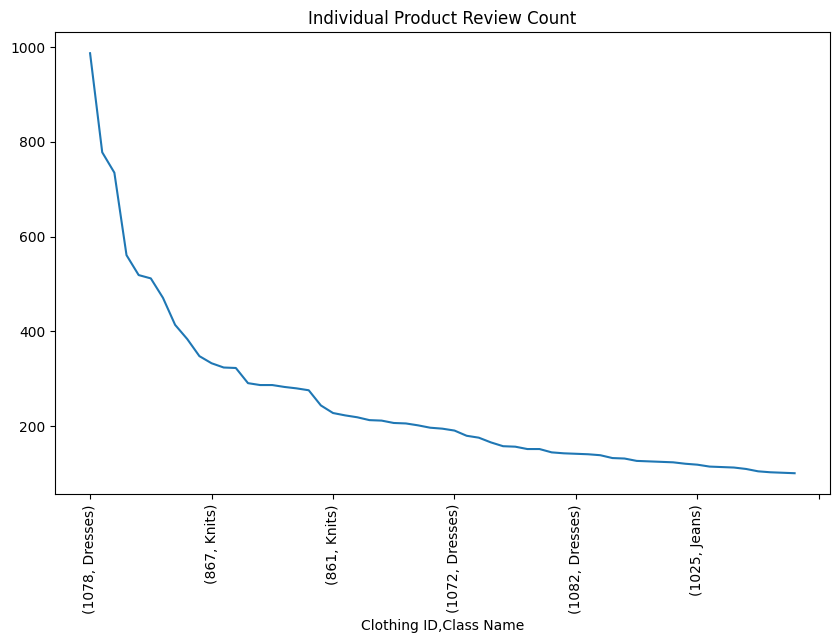

In [20]:
#Analyzing Product Reviews
cloth_id[cloth_id['Clothing ID']['count'] > 100].plot(title='Individual Product Review Count', legend=False, figsize=(10,6), rot=90)

In [21]:
# Checking if the classes of the number of products with reviews > 100 reflects overall numbers
cloth_id[cloth_id['Clothing ID']['count'] >100].groupby('Class Name').agg({('Clothing ID', 'count'):['count', 'sum']})

Clothing ID      
                 count      
                 count   sum
Class Name                  
Blouses             11  2247
Dresses             15  5156
Fine gauge           3   630
Jackets              2   279
Jeans                5   761
Knits               14  3856
Pants                4   704
Skirts               2   337
Sweaters             3   681

<Axes: >

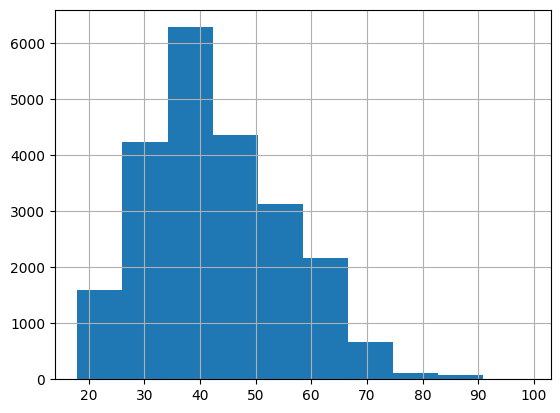

In [22]:
#Showing the distributiono of Reviewer's Age
rev_data[('Age')].hist()

In [23]:
#Curious about the number of reviewers above and below 43 yrs old
print ('Number below average of 43: ', rev_data.Age[rev_data['Age'] < 43].count())
print ('Number 43 & above: ', rev_data.Age[rev_data['Age'] >= 43].count())

Number below average of 43:  12111
Number 43 & above:  10530


<Axes: >

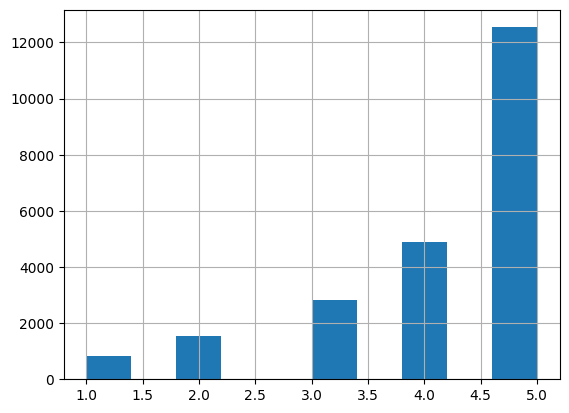

In [24]:
#Plotting rating
rev_data[('Rating')].hist()

#### Observations:
The 3 category names, Division, Department and Class, seem similar but Class seems the most extensive in terms of range of values and may help to provide analysis once clusters have been formed.

Within Class, over a quarter of reviews are for dresses, with the other large groups being knits and blouses. These 3 classes make up over half of the reviews.

Average ratings for classs are just over 4 for nearly all categories except Trend which is 3.8. Perhaps the clothes are seen as not trendy? Something to look out for.

The recommended indicator merely follows the ratings so doesn't offer much new information.

Feedback count of other customers finding reviews positive, is higher per review for the higher categories, with

Dresses with the largest ratio of over 3. The ratio drops slightly as the number of reviews drops, again until Trend where the ratio is also high. Interesting, but probably not much use at this stage (though might help to understand what makes a positive review if that was required?).

Age range is from 18 to 99, with the average being 43 and median 41. This might tell us something about the sorts of things that this age group are concerned about. There is a slight skew towards being younger than the average - 12.5k against around 11k above.

Ratings and recommendation indicator give us an idea of sentiment, and may help with analysis post clustering, although I am looking for insights outside of just sentiment.

Clothing ID shows the unique products. In total there are ~1200 products being reviewed, but nearly 500 of these have just a single review. 162 products have a review count greater than 20, with ~60 prods > 100 reviews. If the actual product were known, the resulting clusters could be grouped by product for feedback.

Of the top reviewed products by volume, the top 3 are in the Classes expected - dresses, knits and blouses.

A low number of products are responsible for most of the reviews:

Dresses: 5156 of 6145 revs from 15 prods - 84%

Knits: 3856 of 4626 revs from 14 prods - 83%

Blouses 2247 of 2983 revs from 11 prods - 75%

So nearly 50% of all reviews is from just 40 products

Assuming that this data represents reviews for all products, the above implies to me that these are the top sellers and get more reviews as more people have bought them. But it could imply that these are the most popular, despite sales. Either way, this retailer has 0.03% of its products making all the buzz. Some initial feedback could be to reduce the product line!

For my purposes here, this again might mean that the breadth of language and what is being talked about is limited. This might be useful giving distinct clusters, or it might mean that clusters are hard to define as language is "homogonous" and we can't distinguish one thing from another.

### Analyzing Reviews (by word count)

In [25]:
rev_data['Title Word Count'] = rev_data['Title'].map(lambda x: len(x.split()))
rev_data['Review Word Count'] = rev_data['Review Text'].map(lambda x: len(x.split()))
len(rev_data)

22641

Text(0, 0.5, 'Number of Reviews')

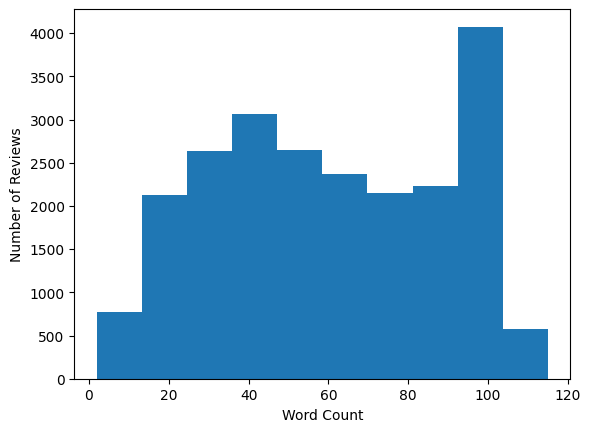

In [26]:
plot = rev_data[('Review Word Count')].plot(kind="hist")
plot.set_xlabel("Word Count")
plot.set_ylabel("Number of Reviews")

In [27]:
rev_data['Review Word Count'].describe()

count    22641.000000
mean        60.196679
std         28.534612
min          2.000000
25%         36.000000
50%         59.000000
75%         88.000000
max        115.000000
Name: Review Word Count, dtype: float64

<Axes: title={'center': 'Review Word Count'}, xlabel='Class Name'>

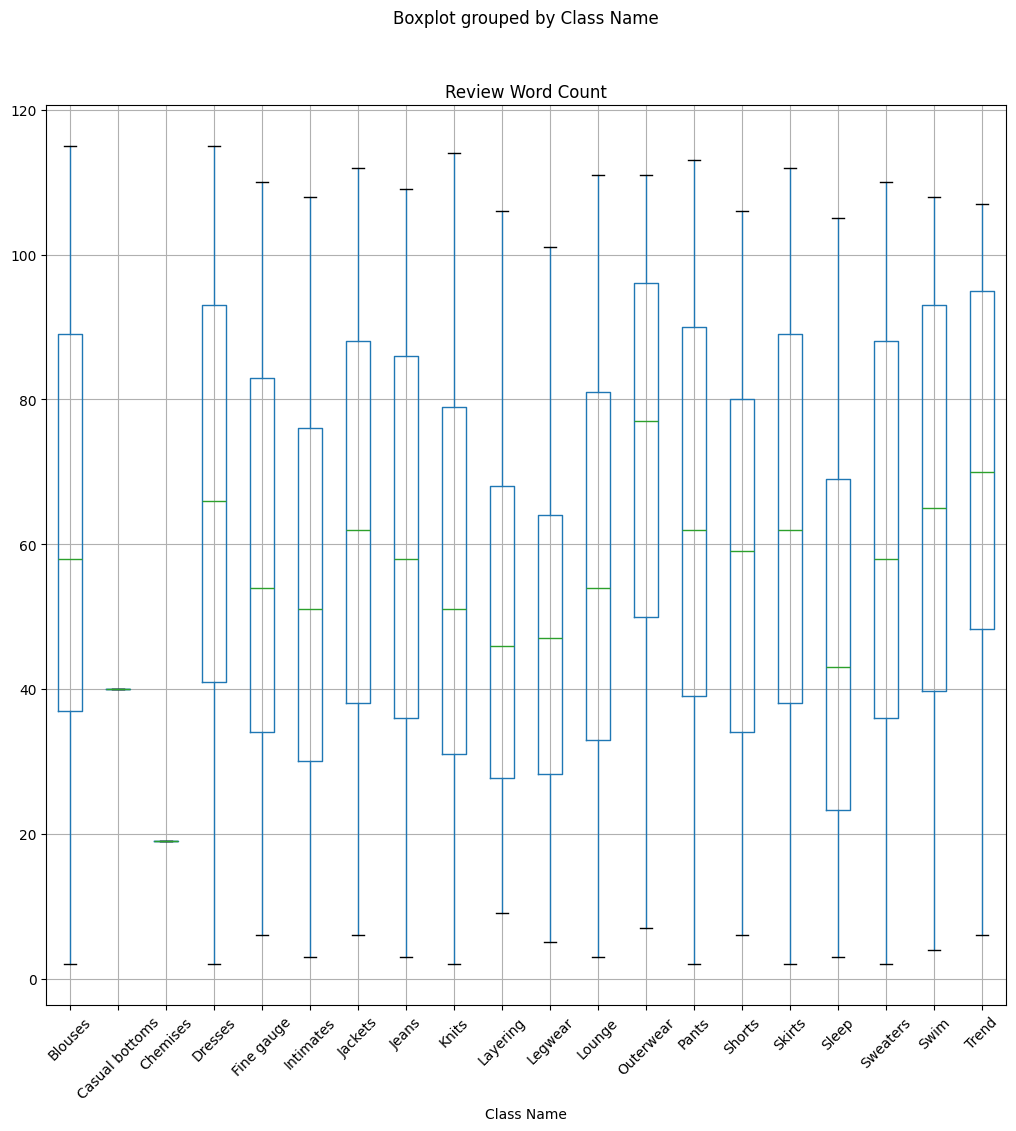

In [28]:
rev_data.boxplot(column='Review Word Count', by='Class Name', figsize=(12,12), rot=45)

<Axes: title={'center': 'Review Word Count'}, xlabel='Rating'>

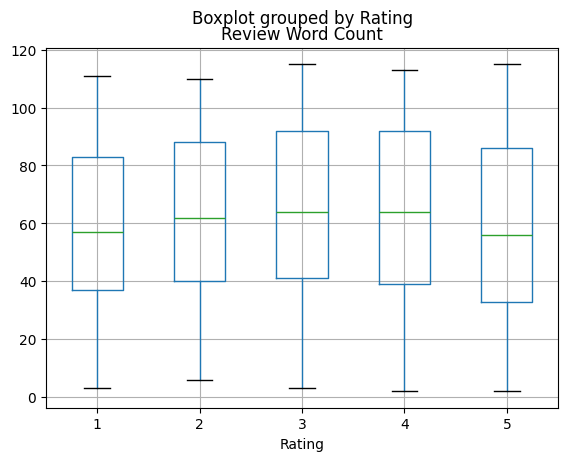

In [29]:
rev_data.boxplot(column='Review Word Count', by='Rating')

<Axes: >

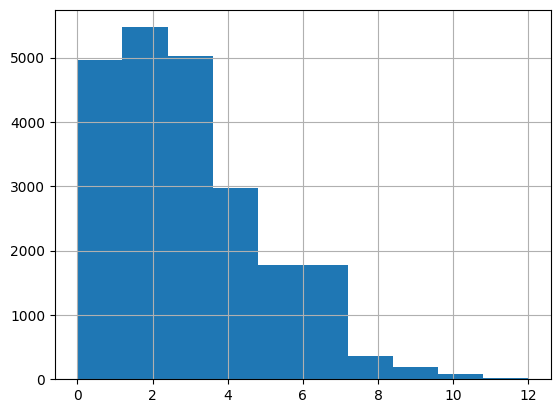

In [30]:
rev_data['Title Word Count'].hist()

### Text Observations

Removing reviews with no text has reduced numbers by just over 800 and seems fairly random across age.

Word counts for the reviews are mainly 30-100 words, which is about 4 - 12 lines. Enough for a few sentences in each. There are around 700 short reviews, < 30 words, and around 500 long reviews, > 100. I don't forsee this as a problem but worth bearing in mind after clustering in case there is an impact.

These might be outliers, but we need to keep them in at this stage.

Distribution of word count seems fairly normal with a spike for reviews of around 100 words and mean of 60.

Titles are much shorter. We thought we'd check to see if there might be some meaning to glean here but we think the text is too short, so will ignore for now.

### Checking on some reviews

In [33]:
pd.set_option('display.max_colwidth', None)
rev_data['Review Text'].sample(n=100)

11319                                                                                                                                                                                                                                                                                                                                                                       I think i'll get a lot of wear out of this. you will be able to size down & it will still hide a host of sins. it's very comfortable and stylish.
12174                                                                                                                                                                                This is one great button up shirt ! the fringe hem is a fun little detail that gives this shirt some serious versatility. it looks great layered under jackets and sweaters, with a came underneath, or all on its own. the fabric could be a bit thicker. i am between a small and a medium ( a 6 or an 8), and boug

### Initial Thoughts on Text

There is a lot of positive text and this is borne out by the number of positive ratings. We'll look further into the breakdown. Our worry is that this will give the language all of the same feel, so clusters might be large and indistinct.

The fact that the ratings are mainly about dresses, knitwear and blouses might also restrict the breadth of expression. But we will see.

We can also observe reviews contain multiple sentences, and these sentences themselves often contain more than one area of attention.

For example, in this review extract:

    it was soft and cuddly, but a little baggy under the arms, and it shed everywhere.

This can be broken down into:

    it was soft and cuddly

    a little baggy under the arms

    it shed everywhere

These make for nice discreet categories, so if the clustering algorithm can identify these and we allow a review to be in more than one cluster, then hopefully we'll see something like these. Splitting at sentence level might make sense in terms of reading clusters (rather than at review level) but splitting a sentence out might be harder as it isn't always obvious where the split of a sentence's meaning lies.

In [34]:
def percentage(part, whole):
  return 100 * float(part)/float(whole)

In [35]:
total_rec_cnt = rev_data.Rating.count()
rate_4_above = rev_data.Rating[rev_data['Rating'] > 3].count()
rate_3_below = rev_data.Rating[rev_data['Rating'] < 4].count()
rate_2_below = rev_data.Rating[rev_data['Rating'] < 3].count()
rate_4_above_perc = percentage(rate_4_above, total_rec_cnt)
rate_3_below_perc = percentage(rate_3_below, total_rec_cnt)
rate_2_below_perc = percentage(rate_2_below, total_rec_cnt)

print ('Total number of ratings {}. '.format(total_rec_cnt))

print ('Number of ratings 4 and above {}. Percentage of Total: {:.2f}'.format(rate_4_above, rate_4_above_perc))
print ('Number of ratings 3 and below {}. Percentage of Total: {:.2f}'.format(rate_3_below, rate_3_below_perc))
print ('Number of ratings 2 and below {}. Percentage of Total: {:.2f}'.format(rate_2_below, rate_2_below_perc))

Total number of ratings 22641. 
Number of ratings 4 and above 17448. Percentage of Total: 77.06
Number of ratings 3 and below 5193. Percentage of Total: 22.94
Number of ratings 2 and below 2370. Percentage of Total: 10.47


In [36]:
# Pull out individual products that are low rated and the class they are in
cloth_id_low_rate = pd.DataFrame(rev_data[rev_data['Rating'] < 3].groupby(['Clothing ID', 'Class Name']).agg({'Clothing ID':['count']}).sort_values(by=[('Clothing ID', 'count')], ascending=False))

cloth_id_low_rate

,,Clothing ID
,,count
Clothing ID,Class Name,
1078,Dresses,91
862,Knits,83
1094,Dresses,70
868,Knits,62
829,Blouses,51
...,...,...
706,Lounge,1
719,Lounge,1


In [37]:
# See if the classes of products rated 1 have just 1 review as well
# To see if negative reviews are on their own with no positives to balance them
cloth_id_low_rate[cloth_id_low_rate['Clothing ID']['count'] == 1].groupby('Class Name').agg({('Clothing ID', 'count'):['count', 'sum']})


Clothing ID    
                 count    
                 count sum
Class Name                
Blouses              4   4
Dresses              9   9
Fine gauge          11  11
Intimates           10  10
Jackets             13  13
Jeans                6   6
Knits                3   3
Layering             8   8
Legwear              4   4
Lounge              30  30
Outerwear            4   4
Pants                9   9
Shorts               8   8
Skirts               3   3
Sleep               19  19
Sweaters             7   7
Swim                20  20
Trend                6   6

We checked to see if the low ratings (1 or 2) were the only review for a product, in case this might make the text "outliers" in the sense that they are a standalone criticism with no balance of a positive review. 172 products with a single review have a low rating, around a third of the products with a single rating. This is 3 times higher than the low rating across all products of 10%.

But it's less than 10% of all low rated reviews. So whilst a lot of single review products have a higher chance of having a low rating (and more negative language) this doesn't represent a significant portion of the low rating text.

The losers with single ratings which are low are Loungewear, Swimwear and Sleepwear.

## Cleaning of Data

Checking for special characters like:

    * html - various tags
    * editor instructions like \n \r

Item Count

    \n - 2024

    \r - 1398

    "<" - 8

    ">" - 6

html head - 0

In [38]:
import re
def re_check_slash(text):
    return re.findall(r'(\n|\r|\t|\f)', text)

In [39]:
# Check for control characters
all_checks = []
for rev in rev_data['Review Text']:
    all_checks += re_check_slash(rev)

# Convert list to set of unique values
set(all_checks)

{'\n', '\r'}

### Text Analysis

Here we will explore the text in more detail looking for patterns and any common words and expressions.

In [40]:
rev_data[rev_data.duplicated(subset='Review Text')]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Word Count,Review Word Count
10067,10067,1171,26,Love retailer bathing suits!,Perfect fit and i've gotten so many compliments. i buy all my suits from here now!,5,1,0,Initmates,Intimate,Swim,4,16
11074,11074,628,60,Cute cover-up or summer top & shorts!,"Lightweight, soft cotton top and shorts. i think it's meant to be a beach cover-up but i'm wearing it as a thin, light-weight summer outfit on these hot hot days. the top has a loose elastic around the bottom which i didn't realize when i ordered it, but i like it and it matches the look in the photos. and the shorts are very low-cut - don't expect them up around your waist. again, i like that. some might want to wear a cami underneath because it's a thin cotton but i'm fine as-is. i bought it i",5,1,2,Initmates,Intimate,Lounge,7,98
12526,12526,1081,42,"Beautiful dress, fits horribly","I purchased this and another eva franco dress during retailer's recent 20% off sale. i was looking for dresses that were work appropriate, but that would also transition well to happy hour or date night. they both seemed to be just what i was looking for. i ordered a 4 regular and a 6 regular, as i am usually in between sizes. the 4 was definitely too small. the 6 fit, technically, but was very ill fitting. not only is the dress itself short, but it is very short-waisted. i am only 5'3"", but it fe",2,0,3,General,Dresses,Dresses,4,96
13354,13354,393,26,Love retailer bathing suits!,Perfect fit and i've gotten so many compliments. i buy all my suits from here now!,5,1,0,Initmates,Intimate,Swim,4,16
14275,14275,879,43,Love this shirt,"I bought this shirt at the store and after going home and trying it on, i promptly went online and ordered two more! i've gotten multiple compliments anytime i wear any of them. great for looking put together with no fuss. \r\npeople that have commented there's were destroyed in the wash didn't read the care label which says dry clean.",5,1,0,General Petite,Tops,Knits,3,60
21470,21470,895,60,Soft & beautiful!,"The sweater and skirt are so pretty! they're really soft and have such an easy, comfortable look together. really love this gorgeous outfit.\n\ni am borderline small/medium and kept the size small after trying both on.",5,1,5,General Petite,Tops,Fine gauge,3,36
21888,21888,1022,37,,"Love, love these jeans. being short they come right to my ankle. super soft and don?t require any hemming. i ordered my typical jean size of 26 and they fit like a glove. would love to have these in black and grey.",5,1,0,General,Bottoms,Jeans,0,42


In [41]:
undata = rev_data.drop_duplicates(subset='Review Text')

In [42]:
import string
import nltk
import nltk.data
#nltk.download()   

from nltk import data, bigrams
# from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [43]:
# A few standard operations on the text to get to words that add value

def scrub_text(text,
               html=False,
               hyphen=False,
               stemmer=False,
               stopwords=False,
               punctuation=False,
               lem=False,
               w2v=False):
    """Return cleaned up text."""
    if html:
        text = BeautifulSoup(text).get_text()  # Deal with HTML

    if hyphen:
        text = ' '.join(re.split('[-]+', text)) # Split out hyphenated words 
    
    text = re.sub('\.(?!\s)(?!$)', '. ', text) # Add space after "."
    
    word_tokens = word_tokenize(text.lower())
    if punctuation:
        word_tokens = [word for word in word_tokens if word not in punctuation]
    word_tokens = [word for word in word_tokens if word.isalnum()]
    word_tokens = [word for word in word_tokens if not word.isdigit()]
    
    if stopwords:
        word_tokens = [word for word in word_tokens if word not in stopwords]
    
    if lem:
        word_tokens = [lem.lemmatize(word) for word in word_tokens]
    
    if stemmer:
        word_tokens=[stemmer.stem(word) for word in word_tokens]
    
    if w2v:
        return word_tokens
    else:
        return ' '.join(word_tokens)

In [44]:
# clean text - tokenize, remove stopwords & punctuation but don't stem or lem

#lem = nltk.WordNetLemmatizer()
#stemmer = SnowballStemmer("english")
sw = stopwords.words('english')
punctuation=set(list(string.punctuation))

undata['cleantxt'] = undata['Review Text'].map(lambda x: scrub_text(x,
                                                                    hyphen=True,
                                                                    stopwords=sw,
                                                                    punctuation=punctuation))

In [45]:
undata.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Word Count,Review Word Count,cleantxt
0,0,767,33,,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,0,8,absolutely wonderful silky sexy comfortable
1,1,1080,34,,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,0,62,love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hits little knee would definitely true midi someone truly petite
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,4,98,high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,3,22,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,2,36,shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt


In [46]:
# Build a list of all words from reviews in order to create a corpus

def create_corpus(data, text_field):
    """Return NLTK text corpus."""
    cnt = 0 
    build_text = []
    for row in data[text_field]:
        token = word_tokenize(row)
        build_text.extend(token)
        cnt += 1
        if cnt % 5000 == 0:
            print("Docs processed:", cnt)

    corp = nltk.Text(build_text)
    return corp, build_text

In [47]:
corp_data, tokens = create_corpus(undata, 'cleantxt')

Docs processed: 5000
Docs processed: 10000
Docs processed: 15000
Docs processed: 20000


In [48]:
len(tokens)

635819

In [49]:
freq_dist = nltk.FreqDist(corp_data)
freq_dist.most_common(50)

[('dress', 10539),
 ('love', 8945),
 ('size', 8751),
 ('top', 7393),
 ('fit', 7300),
 ('like', 7144),
 ('wear', 6433),
 ('great', 6114),
 ('would', 5429),
 ('fabric', 4787),
 ('small', 4673),
 ('color', 4582),
 ('look', 4028),
 ('really', 3923),
 ('ordered', 3846),
 ('little', 3775),
 ('perfect', 3770),
 ('one', 3635),
 ('flattering', 3515),
 ('well', 3390),
 ('soft', 3332),
 ('back', 3214),
 ('comfortable', 3055),
 ('cute', 3041),
 ('nice', 3020),
 ('bought', 2983),
 ('beautiful', 2964),
 ('looks', 2873),
 ('bit', 2866),
 ('fits', 2853),
 ('large', 2815),
 ('shirt', 2808),
 ('material', 2760),
 ('much', 2709),
 ('length', 2672),
 ('also', 2587),
 ('sweater', 2512),
 ('long', 2460),
 ('got', 2426),
 ('could', 2384),
 ('jeans', 2372),
 ('colors', 2360),
 ('petite', 2339),
 ('waist', 2326),
 ('quality', 2290),
 ('medium', 2231),
 ('pretty', 2192),
 ('think', 2185),
 ('even', 2172),
 ('retailer', 2157)]

In [50]:
top_words = pd.DataFrame(freq_dist.most_common(10), columns=('Word', 'Count'))
top_words

,Word,Count
0,dress,10539
1,love,8945
2,size,8751
3,top,7393
4,fit,7300
5,like,7144
6,wear,6433
7,great,6114
8,would,5429
9,fabric,4787


#### Plot of word count in Review Text

<Axes: xlabel='Samples', ylabel='Counts'>

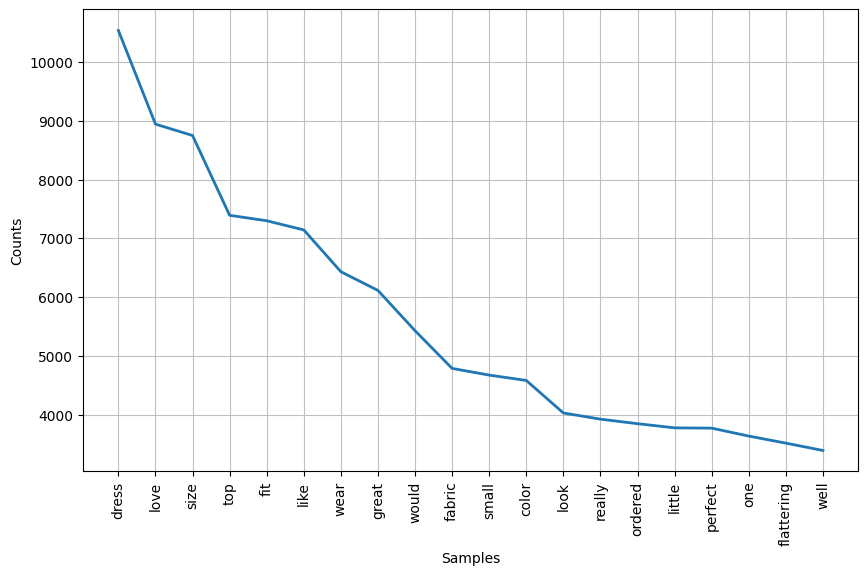

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

freq_dist.plot(20,cumulative=False)

In [52]:
# calculate bigrams
terms_bigram = bigrams(tokens)
bi_fdist = nltk.FreqDist(terms_bigram)
top_bigrams = pd.DataFrame(bi_fdist.most_common(50), columns=('Word Pair', 'Count'))
top_bigrams

,Word Pair,Count
0,"(true, size)",1343
1,"(love, dress)",748
2,"(usually, wear)",690
3,"(looks, great)",622
4,"(well, made)",606
5,"(fit, perfectly)",604
6,"(love, top)",571
7,"(size, small)",524
8,"(fits, perfectly)",486
9,"(usual, size)",479


In [53]:
corp_data.similar('dress')

top fit shirt love color sweater fabric size skirt really colors great
flattering one would comfortable look perfect small pants


In [54]:
corp_data.concordance('back')

Displaying 25 of 3214 matches:
istmas dress year needless say going back dress perfection pretty flattering f
pregnant bough medium grow tie front back provides nice flexibility form fitti
kirt portion pretty poofy keep going back forth mainly price although quality 
p wear leggings bought slip wore tie back rocked white wedges could also wear 
aned ordered months ago finally came back order huge disappointment fit much i
le still worth paid definitely going back neat dress color great fabric super 
 pilcro stet jeans flattering peplum back nice cut shoulders neckline pretty u
nerally wear small fit well probably back black bought item online fit model l
loose got mine seemed bit tight took back store ordered larger size sale price
tty unusual look great slight peplum back hangs nicely lightweight tee fabric 
es though tank fit well loved ruffle back layed front good look retuning got p
lor nice lines downside retailer tag back itchy need remove dress simply beaut
rfect could happier p

### More thoughts on text

As expected, the top words appearing are for dress and love - very positive! Followed by size, top, fit and like. This isn't revealing much beyond what we'd expect with reviews on womens clothes. Fabric and color are around the 10th position and probably the first words I'd rate as carrying some meaning that might useful feedback.

Ordered appears around 15th which might indicate some feedback on the ordering process.

Lots of words about attributes of clothes and sizes.

**Again, collocations reveal some positive pairings if words like fits perfectly and highly recommended! "Going back" and "full price" stand out as possible negatives that occur though price isn't mentioned in the top 50 pairings but going back does have nearly 300 mentions.

In [55]:
corp_data.common_contexts(['going', 'back'])

small_order one_get detail_front could_back one_home detail_fabric
back_back longer_wearing way_keep


<Axes: >

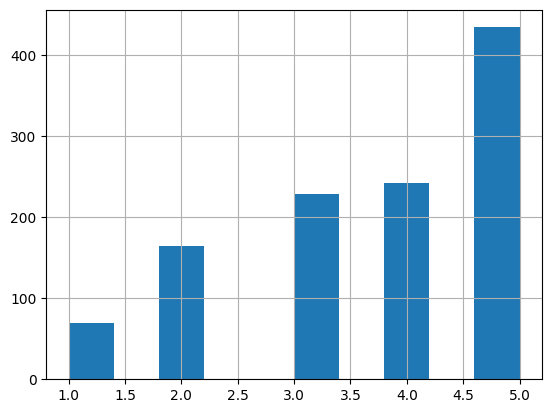

In [56]:
undata['Rating'][undata['Review Text'].str.contains('going', 'back')].hist()

In [57]:
print(undata['Rating'][undata['Review Text'].str.contains('going', 'back')].count())
print(undata['Rating'][undata['Review Text'].str.contains('going', 'back')].value_counts())

1138
Rating
5    434
4    242
3    229
2    164
1     69
Name: count, dtype: int64


In [58]:
print(undata['Rating'][undata['Review Text'].str.contains('ordered')].count())
print(undata['Rating'][undata['Review Text'].str.contains('ordered')].value_counts())

3405
Rating
5    1598
4     827
3     513
2     318
1     149
Name: count, dtype: int64


Text containing 'going' and 'back' has much lower ratings - about 20% 1 or 2, compared with overall of 10%.

Ordered is less than overall at just under 14% low ratings.

In [59]:
corp_data.similar('ordered')

bought got size tried purchased love small dress usually petite went
wear medium top true perfect fit order regular xs


In [60]:
# Review word count
undata['rev_word_count']= undata['Review Text'].apply(lambda x: len(x.strip().split()))

# Unique word count
undata['unique_word_count']= undata['Review Text'].apply(lambda x: len(set(str(x).split())))

In [61]:
undata.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Title Word Count',
       'Review Word Count', 'cleantxt', 'rev_word_count', 'unique_word_count'],
      dtype='object')

In [64]:
# Bucketing Clothing ID's with 1 or 2 count

clothing_id_to_combine=[]
for val, cnt in undata['Clothing ID'].value_counts().items():
    # If that Clothing_ID is present less than 1%(~200) of the total data, club it into '000' (default) id
    if(cnt<200):         
        clothing_id_to_combine.append(val)        

print("# of clothing ID's clubbed: ",len(clothing_id_to_combine))

undata['new_clothingID'] = undata['Clothing ID'].apply(lambda x: '000' if x in clothing_id_to_combine else x)
undata.new_clothingID.value_counts(normalize=True)

# of clothing ID's clubbed:  1149


new_clothingID
000     0.542944
1078    0.043607
862     0.034373
1094    0.032473
1081    0.024742
872     0.022930
829     0.022621
1110    0.020809
868     0.018291
895     0.016921
936     0.015375
867     0.014712
850     0.014315
1095    0.014271
863     0.012857
1077    0.012680
1059    0.012680
1086    0.012503
1080    0.012371
860     0.012194
1083    0.010780
861     0.010073
873     0.009852
1092    0.009676
828     0.009411
1033    0.009366
927     0.009146
1056    0.009101
820     0.008925
Name: proportion, dtype: float64

## Clustering

First use a KMeans model for a benchmark.

Break out reviews to sentences.

Need to do some pre-processing which can be used for the main model too.

In [65]:
# Review word count
undata['rev_word_count']= undata['Review Text'].apply(lambda x: len(x.strip().split()))

# Unique word count
undata['unique_word_count']= undata['Review Text'].apply(lambda x: len(set(str(x).split())))

In [68]:
# Bucketing Clothing ID's with 1 or 2 count

clothing_id_to_combine=[]
for val, cnt in undata['Clothing ID'].value_counts().items():
    # If that Clothing_ID is present less than 1%(~200) of the total data, club it into '000' (default) id
    if(cnt<200):         
        clothing_id_to_combine.append(val)        

print("# of clothing ID's clubbed: ",len(clothing_id_to_combine))

undata['new_clothingID']= undata['Clothing ID'].apply(lambda x: '000' if x in clothing_id_to_combine else x)
undata.new_clothingID.value_counts(normalize=True)


# of clothing ID's clubbed:  1149


new_clothingID
000     0.542944
1078    0.043607
862     0.034373
1094    0.032473
1081    0.024742
872     0.022930
829     0.022621
1110    0.020809
868     0.018291
895     0.016921
936     0.015375
867     0.014712
850     0.014315
1095    0.014271
863     0.012857
1077    0.012680
1059    0.012680
1086    0.012503
1080    0.012371
860     0.012194
1083    0.010780
861     0.010073
873     0.009852
1092    0.009676
828     0.009411
1033    0.009366
927     0.009146
1056    0.009101
820     0.008925
Name: proportion, dtype: float64

Calibrating Title and Review sentiment scores using VADER Sentiment!
VADER (Valence Aware Dictionary and sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

In [74]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer= SentimentIntensityAnalyzer()

# Try it out!
vs= analyzer.polarity_scores("Vader sentiment looks interesting, I have high hopes!")
print(vs)

{'neg': 0.0, 'neu': 0.509, 'pos': 0.491, 'compound': 0.6996}


The compound score obtained from valence scores is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

In [77]:
undata['review_sentiment']= [analyzer.polarity_scores(line)['compound'] for line in undata['Review Text']]

In [78]:
undata.review_sentiment.head(5)

0    0.8932
1    0.9729
2    0.9208
3    0.5727
4    0.9291
Name: review_sentiment, dtype: float64

After analyzing certain Title sentiments, we notice that titles with 0 scores consist of positive, negative and neutral sentiments:

Negative sentiments with 0 score:
   * Falls flat >>>>> 0.0
   * Runs short >>>>> 0.0

Positive sentiments with 0 score:
   * Must have >>>>> 0.0
   * Comfy >>>>> 0.0
   * Stylish and versatile! >>>>> 0.0

Neutral sentiments with 0 score:
   * Simple, stylish, lovely-runs a bit big >>>>> 0.0
   * Some things you should know... >>>>> 0.0
   * Mehh >>>>> 0.0
   * Neutral blue >>>>> 0.0

Hence we have assigned score '0.0' score to 'No title' above.

In [79]:
# Title provides extra insight of the sentiment of the customer while writing the review. Hence we will also obtain Title sentiment alongwith review sentiment score.
# However 13% reviews don't have a Title. Hence filling in the null values with 'no title' and assigning it 0(neutral) sentiment

undata.Title.fillna('no title', inplace=True)
undata['title_sentiment']= undata['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound'] if str(x)!= 'no title' else 0.0)

for index, row in undata[100:120].iterrows():
    print(row['Title']," >>>>>", row['title_sentiment'])

Not a fan  >>>>> -0.2411
  >>>>> 0.0
Excited ... but ...  >>>>> 0.1779
Beautiful shirt but runs small!  >>>>> 0.4102
Beautiful  >>>>> 0.5994
Perfect fall shirt!  >>>>> 0.6114
  >>>>> 0.0
Poor quality  >>>>> -0.4767
An almost for me...  >>>>> 0.0
Beautiful, stunning, cozy top!  >>>>> 0.8221
Cute and comfy  >>>>> 0.4588
Disappointing quality  >>>>> -0.4939
Cute tee  >>>>> 0.4588
Very vintage feel  >>>>> 0.0
  >>>>> 0.0
Awkward fitting  >>>>> -0.1531
Cozy casual - perfect for fall  >>>>> 0.6705
The perfect striped t  >>>>> 0.5719
  >>>>> 0.0
  >>>>> 0.0


In [80]:
undata['total_sentiment_score']= undata['title_sentiment'] + undata['review_sentiment']

In [81]:
# Golden rule: Save up the original dataframe before encoding!
undata_orig= undata.copy()
undata_orig.shape 

(22634, 20)

In [82]:
undata

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Word Count,Review Word Count,cleantxt,rev_word_count,unique_word_count,new_clothingID,review_sentiment,title_sentiment,total_sentiment_score
0,0,767,33,,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,0,8,absolutely wonderful silky sexy comfortable,8,7,000,0.8932,0.0000,0.8932
1,1,1080,34,,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,0,62,love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hits little knee would definitely true midi someone truly petite,62,47,1080,0.9729,0.0000,0.9729
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,4,98,high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c,98,72,1077,0.9208,0.0000,0.9208
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,3,22,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments,22,20,000,0.5727,0.5093,1.0820
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,2,36,shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt,36,28,000,0.9291,0.3182,1.2473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,5,1,0,General Petite,Dresses,Dresses,5,28,happy snag dress great price easy slip flattering cut color combo,28,23,000,0.9152,0.6249,1.5401
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me but maybe for others. just ok.",3,1,0,General Petite,Tops,Knits,6,38,reminds maternity clothes soft stretchy shiny material cut flattering drapes nicely found one button close front looked awkward nice long sleeves maybe others ok,38,36,862,0.3919,0.4019,0.7938
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",3,0,1,General Petite,Dresses,Dresses,4,42,fit well top see never would worked glad able try store order online different fabric would great,42,36,000,0.9343,0.2500,1.1843
23484,23484,1084,28,"Ver

### Feature Encoding and prepping up our data for clustering

In [83]:
# Dropping text columns- we have already used them to calcuate the total sentiment score

undata.drop(columns=['Unnamed: 0','cleantxt','Review Text','Title','Clothing ID','review_sentiment','title_sentiment','Title Word Count','Review Word Count'], inplace=True)

In [84]:
# Deciding on categorical columns- object datatype -very slow processing

cat_cols= ['Division Name','Department Name','Class Name','new_clothingID']
for col in cat_cols:
    print(col," has categories:", undata[col].nunique())
    undata[col]= undata[col].astype('category')

Division Name  has categories: 3
Department Name  has categories: 6
Class Name  has categories: 20
new_clothingID  has categories: 29


In [85]:
undata.head(5)

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,rev_word_count,unique_word_count,new_clothingID,total_sentiment_score
0,33,4,1,0,Initmates,Intimate,Intimates,8,7,000,0.8932
1,34,5,1,4,General,Dresses,Dresses,62,47,1080,0.9729
2,60,3,0,0,General,Dresses,Dresses,98,72,1077,0.9208
3,50,5,1,0,General Petite,Bottoms,Pants,22,20,000,1.0820
4,47,5,1,6,General,Tops,Blouses,36,28,000,1.2473


In [87]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 8.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.8 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.8 MB 4.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.8 MB 2.3 MB/s eta 0:00:04
   ------------- -------------------------- 3.4/9.8 MB 3.2 MB/s eta 0:00:03
   -------------------- ------------------- 5.0/9.8 MB 3.9 MB/s eta 0:00:02
   ------------------------- -------------- 6.3/9.8 MB 4.3 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/9.8 MB 4.8 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
# Binary encoding our categorical columns

import category_encoders as ce
be= ce.BinaryEncoder(cols= cat_cols,drop_invariant=True).fit(undata) 
undata= be.transform(undata)

In [89]:
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
from sklearn.cluster import KMeans
import pylab as pl
%matplotlib inline
import matplotlib.pyplot as plt

In [90]:
pca_tsne= Pipeline([("pca", PCA(n_components= 0.90, random_state=33)),
                    ("tsne", TSNE(n_components=2,
                                  perplexity= 170,
                                  random_state=33, 
                                  learning_rate= 350, 
                                  n_iter= 5000,
                                  n_iter_without_progress=150,
                                  verbose=1))])
t0 = time.time()
df_pca_tsne_reduced= pca_tsne.fit_transform(undata)
t1 = time.time()

print("pca+tsne took:{:.1f}s ".format(t1-t0))

[t-SNE] Computing 511 nearest neighbors...
[t-SNE] Indexed 22634 samples in 0.013s...
[t-SNE] Computed neighbors for 22634 samples in 2.410s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22634
[t-SNE] Computed conditional probabilities for sample 2000 / 22634
[t-SNE] Computed conditional probabilities for sample 3000 / 22634
[t-SNE] Computed conditional probabilities for sample 4000 / 22634
[t-SNE] Computed conditional probabilities for sample 5000 / 22634
[t-SNE] Computed conditional probabilities for sample 6000 / 22634
[t-SNE] Computed conditional probabilities for sample 7000 / 22634
[t-SNE] Computed conditional probabilities for sample 8000 / 22634
[t-SNE] Computed conditional probabilities for sample 9000 / 22634
[t-SNE] Computed conditional probabilities for sample 10000 / 22634
[t-SNE] Computed conditional probabilities for sample 11000 / 22634
[t-SNE] Computed conditional probabilities for sample 12000 / 22634
[t-SNE] Computed conditional probabilities for sa

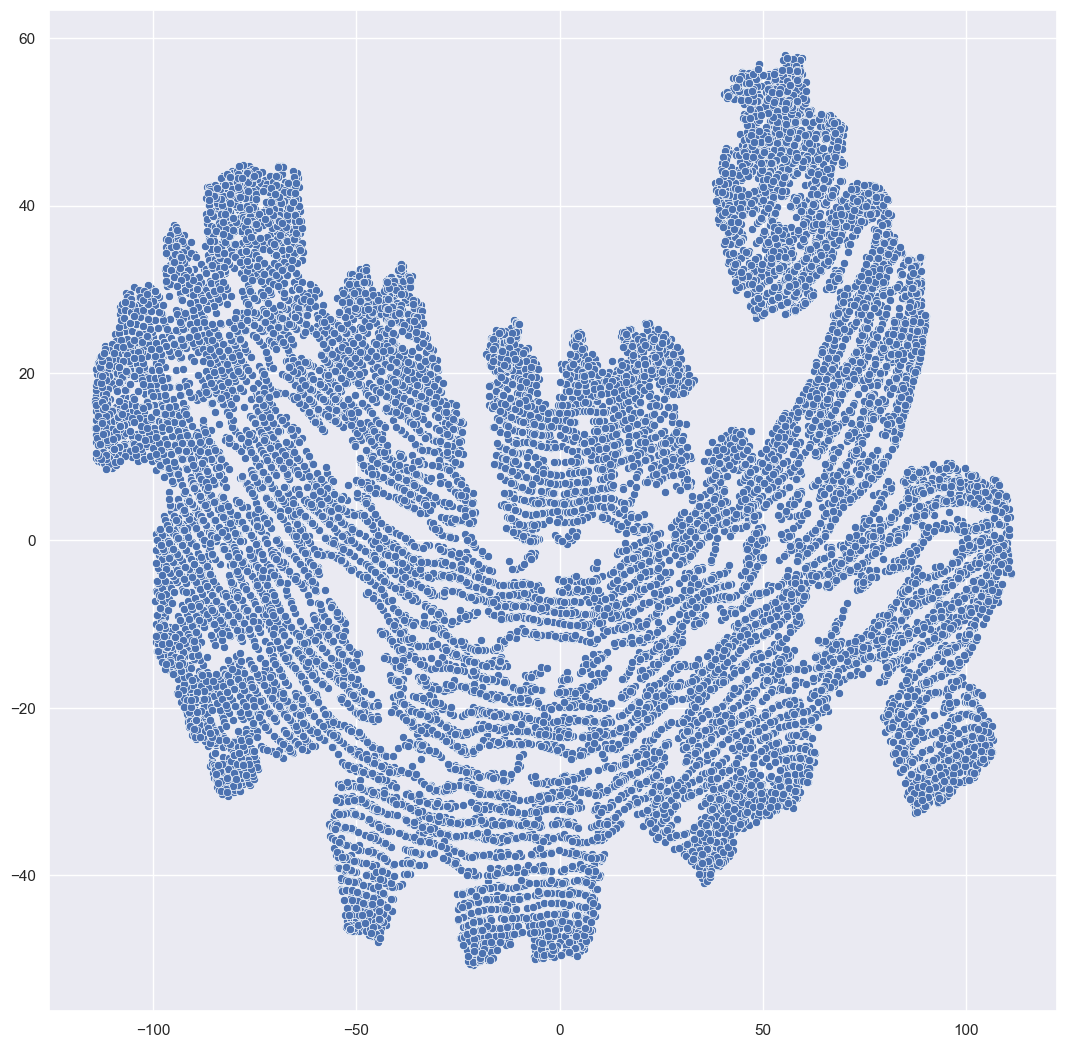

In [92]:
sns.set(rc= {'figure.figsize': (13,13)})
sns.scatterplot(x=df_pca_tsne_reduced[:,0], y=df_pca_tsne_reduced[:,1])
plt.show()

### Using K-Means Clustering

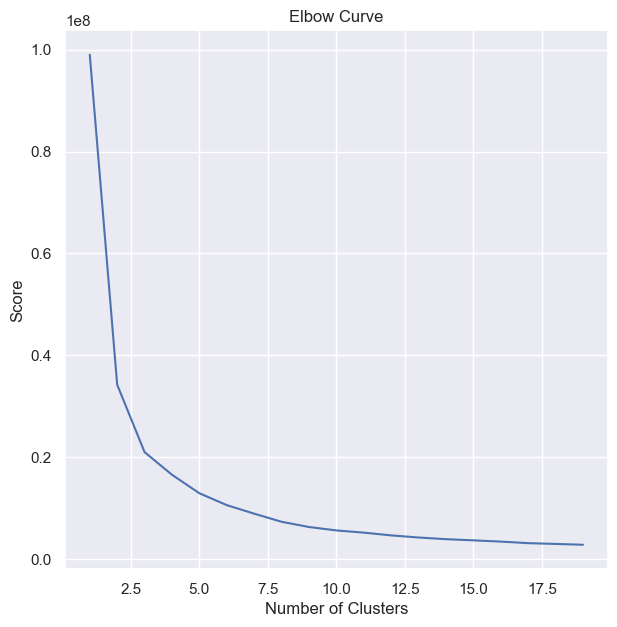

Plotting the Elbow curve took:1.0s 


In [94]:
review_data_std = stats.zscore(df_pca_tsne_reduced)
review_data_std = np.array(review_data_std)

sns.set(rc= {'figure.figsize': (7,7)})
number_of_clusters = range(1,20)

t0= time.time()
kmeans = [KMeans(n_clusters=i, max_iter=1000, random_state=33) for i in number_of_clusters]
score = [-1*kmeans[i].fit(df_pca_tsne_reduced).score(df_pca_tsne_reduced) for i in range(len(kmeans))]
t1= time.time()

pl.plot((number_of_clusters),score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

print("Plotting the Elbow curve took:{:.1f}s ".format(t1-t0))

In [96]:
k_means_test = KMeans(n_clusters=3, max_iter=1500, random_state=33,verbose=1)

#fitting on your model
-1*k_means_test.fit(df_pca_tsne_reduced).score(df_pca_tsne_reduced)
y_pred= k_means_test.labels_

# Assigning cluster labels to each data point
undata_orig['klabels'] = k_means_test.labels_

Initialization complete
Iteration 0, inertia 39280700.0.
Iteration 1, inertia 23241410.0.
Iteration 2, inertia 21632940.0.
Iteration 3, inertia 21220872.0.
Iteration 4, inertia 21105278.0.
Iteration 5, inertia 21059840.0.
Iteration 6, inertia 21035448.0.
Iteration 7, inertia 21022224.0.
Iteration 8, inertia 21015214.0.
Iteration 9, inertia 21010052.0.
Iteration 10, inertia 21006116.0.
Converged at iteration 10: center shift 0.1890876591205597 within tolerance 0.21868989257812502.


In [97]:
# Analyzing 
size_of_each_cluster= undata_orig.groupby('klabels').size().reset_index()
size_of_each_cluster.columns = ['klabels','number_of_points']
size_of_each_cluster['percentage'] = (size_of_each_cluster['number_of_points']/np.sum(size_of_each_cluster['number_of_points']))*100

print(size_of_each_cluster)

   klabels  number_of_points  percentage
0        0              8126   35.901741
1        1              7462   32.968101
2        2              7046   31.130158


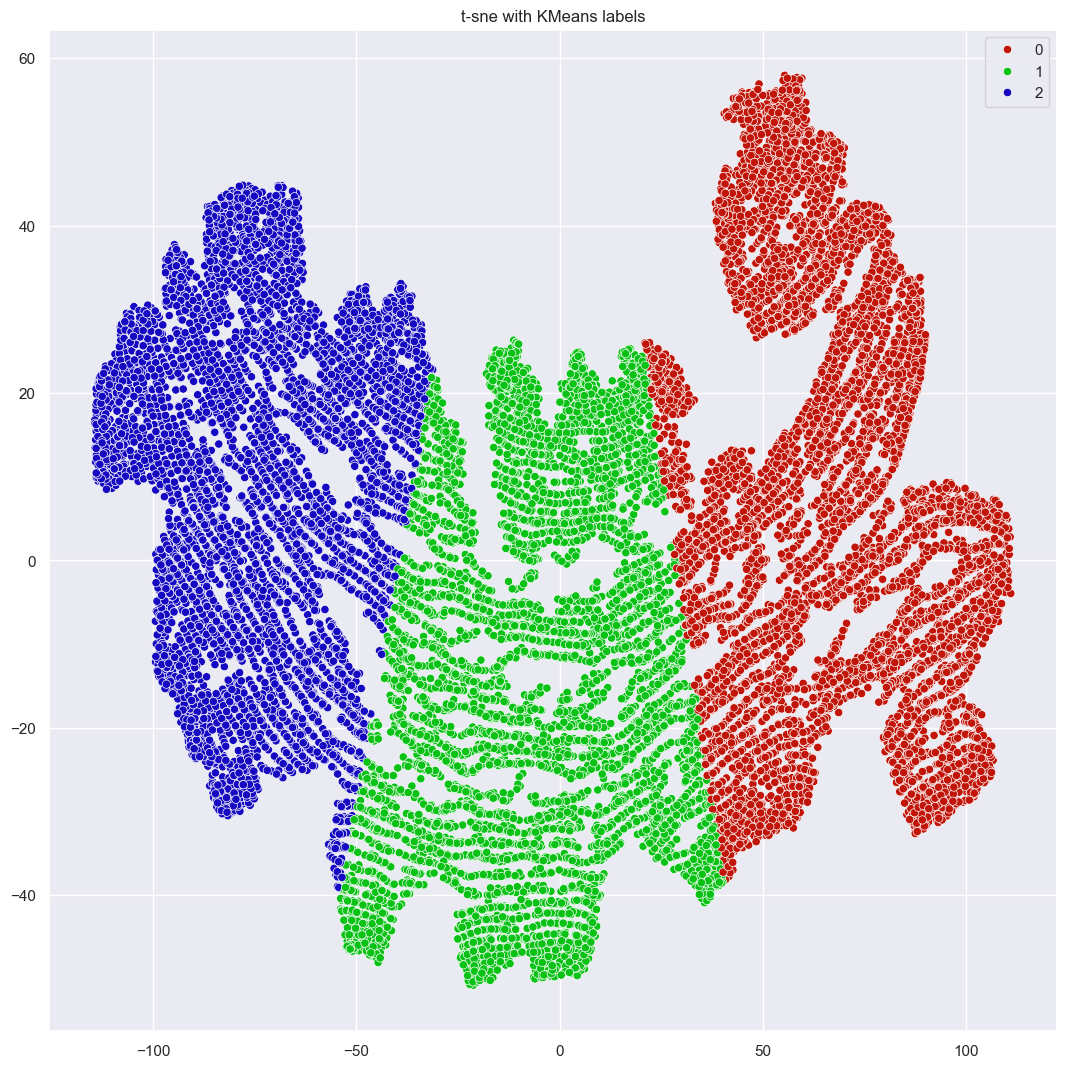

In [101]:
palette = sns.hls_palette(3, l=.4, s=.9)

sns.set(rc= {'figure.figsize': (13,13)})
sns.scatterplot(x=df_pca_tsne_reduced[:,0], y=df_pca_tsne_reduced[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-sne with KMeans labels")
plt.show()

As we can see, the K-Means clusters also closely represents the clusters created by PCA and TSNE. Together it has produced some classic clustering.
Apart from clustering the reviews together, we would also like to understand 'meaning of each cluster'. This can be achieved via TOPIC MODELING.

Hence, now we will attempt to find the most significant words in each cluster. K-means clustered the articles but did not label the topics. Through topic modeling we will find out what the most important terms for each cluster are. This will add more meaning to the cluster by giving keywords to quickly identify the themes of the cluster.

### Topic Modeling- Latent Dirichlet Allocation(LDA)

For topic modeling, we will use the infamous LDA (Latent Dirichlet Allocation) algorithm. In LDA, each document can be described by a distribution of topics and each topic can be described by a distribution of words.

STEP 1: Preprocessing text - Tokenizing sentences, stopwords removal and lemmatization

In [102]:
def get_pos_tag(tag):
    """This function is used to get the part-of-speech(POS) for lemmatization"""
    
    if tag.startswith('N') or tag.startswith('J'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN #default case

In [103]:
import re
def preprocess(text):
    """ 1. Removes Punctuations
        2. Removes words smaller than 3 letters
        3. Converts into lowercase
        4. Lemmatizes words
        5. Removes Stopwords
    """   
    punctuation= list(string.punctuation)
    doc_tokens= nltk.word_tokenize(text)
    word_tokens= [word.lower() for word in doc_tokens if not (word in punctuation or len(word)<=3)]
    
    # Lemmatize    
    pos_tags=nltk.pos_tag(word_tokens)
#     print(pos_tags)
    doc_words=[wordnet_lemmatizer.lemmatize(word, pos=get_pos_tag(tag)) for word, tag in pos_tags]
    doc_words= [word for word in doc_words if word not in stoplist]
    
    return doc_words

df_clean = undata_orig['Review Text'].apply(preprocess)
df_clean.head()

0                                                                                                                                                                                                                                                                     [absolutely, wonderful, silky, sexy, comfortable]
1                                                                                                                      [love, dress, sooo, pretty, happen, find, store, glad, never, would, order, online, petite, buy, petite, love, length, hit, little, knee, would, definitely, true, midi, someone, truly, petite]
2    [high, hope, dress, really, want, work, initially, order, petite, small, usual, size, find, outrageously, small, small, fact, could, reorder, petite, medium, overall, half, comfortable, nicely, bottom, half, tight, layer, several, somewhat, cheap, layer, major, design, flaw, layer, sewn, directly, zipper]
3                                                               

STEP 2: DATA CLEANING- PROCURE ONLY NOUNS AND ADJECTIVES TO OBTAIN MEANINGFUL TOPICS

In [104]:
# Adding business stopwords to exclude

common_terms= ["wear","look","ordered","color","purchase","order"]

stoplist= stoplist+ common_terms

In [105]:
# Tried multiple parts of speech and obtained best topic results using Nouns and Adjectives!
def get_nouns_adjs(series):
    
    " Topic Modeling using only nouns and adjectives"
    
    pos_tags= nltk.pos_tag(series)
    all_adj_nouns= [word for (word, tag) in pos_tags if (tag=="NN" or tag=="NNS" or tag=="JJ")] 
    return all_adj_nouns

df_nouns_adj = df_clean.apply(get_nouns_adjs)

Step 3: Add bigrams to your corpus using Word2vec model from gensim

In [107]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---- ----------------------------------- 2.9/24.0 MB 13.9 MB/s eta 0:00:02
   --------- ------------------------------ 5.5/24.0 MB 14.6 MB/s eta 0:00:02
   ------------- -------------------------- 8.4/24.0 MB 13.7 MB/s eta 0:00:02
   ------------------- -------------------- 11.5/24.0 MB 14.1 MB/s eta 0:00:01
   ------------------------ --------------- 14.9/24.0 MB 14.2 MB/s eta 0:00:01
   ---------------------------- ----------- 17.0/24.0 MB 13.9 MB/s eta 0:00:01
   --------------------------------- ------ 20.2/24.0 MB 14.0 MB/s eta 0:00:01
   -------------------------------------- - 23.3/24.0 MB 14.1 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 14.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   -- ------------------------------------- 2.6/46.2 MB 12.5 MB/s eta 0:00:04
 

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [108]:
# Importing gensim related libraries
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim.corpora import Dictionary
from gensim.models import Phrases
from collections import Counter
from gensim.models import Word2Vec

In [89]:
docs= list(df_nouns_adj)
phrases = gensim.models.Phrases(docs, min_count=10, threshold=20)
bigram_model = gensim.models.phrases.Phraser(phrases)

INFO:gensim.models.phrases:collecting all words and their counts
INFO:gensim.models.phrases:PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO:gensim.models.phrases:PROGRESS: at sentence #10000, processed 174252 words and 96301 word types
INFO:gensim.models.phrases:PROGRESS: at sentence #20000, processed 349795 words and 162819 word types
INFO:gensim.models.phrases:collected 178319 word types from a corpus of 396144 words (unigram + bigrams) and 22634 sentences
INFO:gensim.models.phrases:using 178319 counts as vocab in Phrases<0 vocab, min_count=10, threshold=20, max_vocab_size=40000000>
INFO:gensim.models.phrases:source_vocab length 178319
INFO:gensim.models.phrases:Phraser built with 204 phrasegrams


In [90]:
def make_bigrams(texts):
    return [bigram_model[doc] for doc in texts]

# Form Bigrams
data_words_bigrams = make_bigrams(docs)

In [91]:
# Checkout most frequent bigrams :
bigram_counter1= Counter()
for key in phrases.vocab.keys():
    if key not in stopwords.words('english'):
        if len(str(key).split('_'))>1:
            bigram_counter1[key]+=phrases.vocab[key]

for key, counts in bigram_counter1.most_common(20):
    print(key,">>>>", counts)

b'true_size' >>>> 1317
b'look_great' >>>> 735
b'size_small' >>>> 729
b'order_size' >>>> 629
b'size_size' >>>> 523
b'usual_size' >>>> 496
b'fabric_soft' >>>> 391
b'many_compliment' >>>> 362
b'order_small' >>>> 347
b'soft_comfortable' >>>> 347
b'love_dress' >>>> 346
b'skinny_jean' >>>> 337
b'regular_size' >>>> 332
b'wear_size' >>>> 318
b'material_soft' >>>> 314
b'super_soft' >>>> 312
b'size_large' >>>> 300
b'dress_look' >>>> 292
b'petite_size' >>>> 287
b'fit_true' >>>> 279


Feeding the bigrams into a Word2Vec model produces more meaningful bigrams

In [92]:
w2vmodel = Word2Vec(bigram_model[docs], size=100, sg=1, hs= 1, seed=33, iter=35)
bigram_counter = Counter()

for key in w2vmodel.wv.vocab.keys():
    if key not in stoplist:
        if len(str(key).split("_")) > 1:
            bigram_counter[key] += w2vmodel.wv.vocab[key].count

for key, counts in bigram_counter.most_common(30):
    print(key,">>>>> " ,counts)

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #10000, processed 170495 words, keeping 8309 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #20000, processed 342138 words, keeping 12095 word types
INFO:gensim.models.word2vec:collected 13012 word types from a corpus of 387453 raw words and 22634 sentences
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:effective_min_count=5 retains 3283 unique words (25% of original 13012, drops 9729)
INFO:gensim.models.word2vec:effective_min_count=5 leaves 373587 word corpus (96% of original 387453, drops 13866)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 13012 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 73 most-common words
INFO:gensim.models.word2vec:downsampling leaves estimated 288158 word corpus (77.1% o

INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 14 : training on 387453 raw words (288272 effective words) took 1.3s, 215195 effective words/s
INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 72.46% examples, 203520 words/s, in_qsize 5, out_qsize 0
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 15 : training on 387453 raw words (288401 effective words) took 1.3s, 216669 effective words/s
INFO:gensim.models.base_any2vec:EPOCH 16 - PROGRESS: at 72.46% examples, 2029

INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 30 : training on 387453 raw words (288226 effective words) took 1.5s, 186503 effective words/s
INFO:gensim.models.base_any2vec:EPOCH 31 - PROGRESS: at 69.89% examples, 188600 words/s, in_qsize 5, out_qsize 0
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 31 : training on 387453 raw words (288125 effective words) took 1.4s, 207097 effective words/s
INFO:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 72.46% examples, 2044

many_compliment >>>>>  362
skinny_jean >>>>>  337
body_type >>>>>  229
sale_price >>>>>  220
full_price >>>>>  209
first_time >>>>>  205
local_retailer >>>>>  168
broad_shoulder >>>>>  157
local_store >>>>>  149
base_review >>>>>  137
light_weight >>>>>  131
worth_price >>>>>  127
cami_underneath >>>>>  117
previous_review >>>>>  110
spring_summer >>>>>  108
last_year >>>>>  101
lot_compliment >>>>>  97
read_review >>>>>  97
pencil_skirt >>>>>  90
athletic_build >>>>>  89
right_place >>>>>  89
fall_winter >>>>>  88
denim_jacket >>>>>  88
price_point >>>>>  79
right_amount >>>>>  79
real_life >>>>>  76
tank_underneath >>>>>  75
hand_wash >>>>>  72
ton_compliment >>>>>  71
year_round >>>>>  63


Checkout some cool stuff from the bigram model!

In [93]:
# MostOften mentioned along with the word 'pregnant'
w2vmodel.most_similar(positive= ['pregnant'])

INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


[('baby_bump', 0.5399574637413025),
 ('pregnancy', 0.5114431977272034),
 ('maternity', 0.49187782406806946),
 ('nurse', 0.47786667943000793),
 ('month_pregnant', 0.4729531705379486),
 ('frumpy', 0.4542655348777771),
 ('twin', 0.4480053782463074),
 ('busty', 0.42627111077308655),
 ('empire_waist', 0.41875264048576355),
 ('trimester', 0.40837332606315613)]

In [94]:
# Which color is to 'work' as 'white' is to 'wedding'
w2vmodel.wv.most_similar(['work','white'], ['wedding'], topn=5)

[('black', 0.6031545996665955),
 ('ivory', 0.46926480531692505),
 ('bodysuit', 0.4230625331401825),
 ('cream', 0.4184560179710388),
 ('navy', 0.4131477177143097)]

In [95]:
w2vmodel.wv.most_similar(['price','steal'], ['discount'], topn=5)

[('steep', 0.3949010372161865),
 ('loving', 0.38929957151412964),
 ('quality', 0.3768562376499176),
 ('cute', 0.3725721836090088),
 ('great', 0.3377988338470459)]

In [96]:
# What is a 'deal_breaker', if 'quality'is 'worth_penny' 
w2vmodel.wv.most_similar(positive=["deal_breaker","quality"], negative=["worth_penny"], topn=3)

[('fabric', 0.3884724974632263),
 ('line', 0.38137298822402954),
 ('execution', 0.34788012504577637)]

Step 4: Create a dictionary and corpus for input to our LDA model. Filter out the most common and uncommon words.

In [97]:
dictionary= Dictionary(data_words_bigrams)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.6)
corpus = [dictionary.doc2bow(doc) for doc in docs]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(8309 unique tokens: ['comfortable', 'sexy', 'silky', 'wonderful', 'dress']...)
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary(12095 unique tokens: ['comfortable', 'sexy', 'silky', 'wonderful', 'dress']...)
INFO:gensim.corpora.dictionary:built Dictionary(13012 unique tokens: ['comfortable', 'sexy', 'silky', 'wonderful', 'dress']...) from 22634 documents (total 387453 corpus positions)
INFO:gensim.corpora.dictionary:discarding 11484 tokens: [('narrowing', 1), ('basket', 12), ('darkler', 1), ('ejans', 1), ('jkeep', 1), ('matvehd', 1), ('mintue', 1), ('msallet', 1), ('oops', 1), ('say', 14)]...
INFO:gensim.corpora.dictionary:keeping 1528 tokens which were in no less than 20 and no more than 13580 (=60.0%) documents
INFO:gensim.corpora.dictionary:resulting dictionary: Dictionary(1528 unique tokens: ['comfortable', 'sexy

Number of unique tokens: 1528
Number of documents: 22634


Step 5: Train your LDA model- Topic Modeling

In [176]:
from gensim.models.ldamulticore import LdaMulticore

t0= time.time()
passes= 150
np.random.seed(1) # setting up random seed to get the same results
ldamodel= LdaMulticore(corpus, 
                    id2word=dictionary, 
                    num_topics=4, 
#                   alpha='asymmetric', 
                    chunksize= 4000, 
                    batch= True,
                    minimum_probability=0.001,
                    iterations=350,
                    passes=passes)                    

t1= time.time()
print("time for",passes," passes: ",(t1-t0)," seconds")

INFO:gensim.models.ldamodel:using symmetric alpha at 0.25
INFO:gensim.models.ldamodel:using symmetric eta at 0.25
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running batch LDA training, 4 topics, 150 passes over the supplied corpus of 22634 documents, updating every 22634 documents, evaluating every ~22634 documents, iterating 350x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 11 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #3 = documents up to #16000/22634, outstanding queue si

INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.042*"dress" + 0.040*"size" + 0.020*"look" + 0.018*"small" + 0.014*"wear" + 0.014*"color" + 0.013*"waist" + 0.012*"petite" + 0.011*"length" + 0.011*"perfect"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.023*"color" + 0.022*"size" + 0.020*"shirt" + 0.018*"wear" + 0.018*"look" + 0.017*"order" + 0.016*"jean" + 0.014*"fabric" + 0.014*"nice" + 0.013*"cute"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.039*"dress" + 0.033*"great" + 0.026*"wear" + 0.020*"size" + 0.015*"soft" + 0.014*"comfortable" + 0.014*"material" + 0.013*"look" + 0.012*"color" + 0.012*"perfect"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.036*"dress" + 0.030*"size" + 0.028*"color" + 0.018*"order" + 0.018*"look" + 0.016*"fabric" + 0.016*"great" + 0.014*"beautiful" + 0.014*"love" + 0.013*"small"
INFO:gensim.models.ldamodel:topic diff=0.067697, rho

INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #4 = documents up to #20000/22634, outstanding queue size 5
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.046*"size" + 0.043*"dress" + 0.018*"small" + 0.017*"look" + 0.017*"waist" + 0.016*"petite" + 0.014*"length" + 0.014*"wear" + 0.012*"color" + 0.012*"perfect"
INFO:gensim.models.ldamodel:topic #

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.039*"dress" + 0.037*"great" + 0.029*"wear" + 0.018*"comfortable" + 0.017*"soft" + 0.016*"love" + 0.016*"color" + 0.016*"perfect" + 0.014*"look" + 0.011*"size"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.040*"dress" + 0.033*"size" + 0.026*"color" + 0.021*"order" + 0.021*"look" + 0.018*"fabric" + 0.017*"small" + 0.016*"beautiful" + 0.014*"large" + 0.012*"sweater"
INFO:gensim.models.ldamodel:topic diff=0.045274, rho=0.225541
INFO:gensim.models.ldamodel:-6.116 per-word bound, 69.4 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 14, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 14, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 14, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
IN

INFO:gensim.models.ldamulticore:PROGRESS: pass 18, dispatched chunk #4 = documents up to #20000/22634, outstanding queue size 5
INFO:gensim.models.ldamulticore:PROGRESS: pass 18, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.053*"size" + 0.042*"dress" + 0.021*"waist" + 0.020*"petite" + 0.018*"length" + 0.017*"small" + 0.015*"look" + 0.014*"pant" + 0.014*"short" + 0.014*"order"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.029*"shirt" + 0.022*"color" + 0.021*"size" + 0.018*"look" + 0.016*"wear" + 0.016*"jean" + 0.015*"little" + 0.015*"cute" + 0.013*"fabric" + 0.013*"order"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.039*"dress" + 0.037*"great" + 0.030*"wear" + 0.018*"comfortable" + 0.018*"color" + 0.018*"perfect" + 0.018*"love" + 0.017*"soft" + 0.014*"look" + 0.012*"sweater"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.041*"dress" + 0.033*"size" + 0.025*"color" + 0.022*"look" + 0.021*"order" + 0.019*

INFO:gensim.models.ldamodel:topic diff=0.033318, rho=0.186798
INFO:gensim.models.ldamodel:-6.102 per-word bound, 68.7 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 23, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 23, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 23, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 23, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 23, dispatched chunk #4 = documents up to #20000/22634, outstanding queue size 5
INFO:gensim.models.ldamulticore:PROGRESS: pass 23, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic 

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.031*"shirt" + 0.022*"color" + 0.020*"size" + 0.018*"look" + 0.016*"wear" + 0.016*"little" + 0.016*"cute" + 0.015*"jean" + 0.013*"fabric" + 0.013*"white"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.039*"dress" + 0.038*"great" + 0.031*"wear" + 0.020*"color" + 0.019*"comfortable" + 0.019*"perfect" + 0.019*"love" + 0.017*"soft" + 0.014*"look" + 0.013*"sweater"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.043*"dress" + 0.032*"size" + 0.024*"color" + 0.023*"look" + 0.021*"order" + 0.019*"fabric" + 0.019*"small" + 0.016*"beautiful" + 0.014*"large" + 0.012*"online"
INFO:gensim.models.ldamodel:topic diff=0.028747, rho=0.172366
INFO:gensim.models.ldamodel:-6.098 per-word bound, 68.5 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 28, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 28, dis

INFO:gensim.models.ldamulticore:PROGRESS: pass 32, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 32, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 32, dispatched chunk #4 = documents up to #20000/22634, outstanding queue size 5
INFO:gensim.models.ldamulticore:PROGRESS: pass 32, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.057*"size" + 0.038*"dress" + 0.024*"waist" + 0.022*"petite" + 0.020*"length" + 0.016*"small" + 0.016*"order" + 0.016*"skirt" + 0.016*"short" + 0.015*"pant"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.032*"shirt" + 0.022*"color" + 0.020*"size" + 0.018*"look" + 0.016*"little" + 0.016*"wear" + 0.016*"cute" + 0.015*"jean" + 0.014*"white" + 0.013*"fabric"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.039*"dress" + 0.038*"great" + 0.031

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.045*"dress" + 0.032*"size" + 0.024*"color" + 0.023*"look" + 0.021*"order" + 0.019*"fabric" + 0.019*"small" + 0.016*"beautiful" + 0.014*"large" + 0.013*"online"
INFO:gensim.models.ldamodel:topic diff=0.022480, rho=0.153108
INFO:gensim.models.ldamodel:-6.093 per-word bound, 68.3 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 37, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 37, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 37, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 37, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 37, dispatched chunk #4 = documents

INFO:gensim.models.ldamulticore:PROGRESS: pass 41, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.058*"size" + 0.036*"dress" + 0.025*"waist" + 0.023*"petite" + 0.021*"length" + 0.017*"order" + 0.017*"skirt" + 0.016*"small" + 0.016*"short" + 0.015*"pant"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.032*"shirt" + 0.022*"color" + 0.020*"size" + 0.018*"look" + 0.017*"little" + 0.016*"wear" + 0.016*"cute" + 0.015*"white" + 0.014*"jean" + 0.013*"fabric"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.039*"dress" + 0.038*"great" + 0.032*"wear" + 0.022*"color" + 0.020*"perfect" + 0.020*"love" + 0.020*"comfortable" + 0.017*"soft" + 0.014*"sweater" + 0.014*"look"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.046*"dress" + 0.032*"size" + 0.024*"look" + 0.023*"color" + 0.022*"order" + 0.020*"small" + 0.019*"fabric" + 0.016*"beautiful" + 0.014*"large" + 0.013*"online"
INFO:gensim.models.ldamodel:topic diff=0.019727, 

INFO:gensim.models.ldamulticore:PROGRESS: pass 46, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 46, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 46, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 46, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 46, dispatched chunk #4 = documents up to #20000/22634, outstanding queue size 5
INFO:gensim.models.ldamulticore:PROGRESS: pass 46, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.059*"size" + 0.036*"dress" + 0.025*"waist" + 0.024*"petite" + 0.021*"length" + 0.017*"skirt" + 0.017*"order" + 0.017*"short" + 0.016*"small" + 0.015*"pant"
INFO:gensim.models.ldamodel:to

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.039*"dress" + 0.038*"great" + 0.032*"wear" + 0.023*"color" + 0.021*"perfect" + 0.020*"love" + 0.020*"comfortable" + 0.017*"soft" + 0.015*"sweater" + 0.014*"summer"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.047*"dress" + 0.032*"size" + 0.024*"look" + 0.023*"color" + 0.022*"order" + 0.020*"small" + 0.020*"fabric" + 0.016*"beautiful" + 0.014*"large" + 0.013*"online"
INFO:gensim.models.ldamodel:topic diff=0.015831, rho=0.132852
INFO:gensim.models.ldamodel:-6.090 per-word bound, 68.1 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 51, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 51, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 51, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 

INFO:gensim.models.ldamulticore:PROGRESS: pass 55, dispatched chunk #4 = documents up to #20000/22634, outstanding queue size 5
INFO:gensim.models.ldamulticore:PROGRESS: pass 55, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.060*"size" + 0.034*"dress" + 0.026*"waist" + 0.024*"petite" + 0.021*"length" + 0.018*"skirt" + 0.017*"order" + 0.017*"short" + 0.016*"small" + 0.015*"pant"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.033*"shirt" + 0.022*"color" + 0.019*"size" + 0.017*"look" + 0.017*"little" + 0.016*"wear" + 0.016*"cute" + 0.016*"white" + 0.013*"jean" + 0.013*"fabric"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.039*"dress" + 0.038*"great" + 0.032*"wear" + 0.023*"color" + 0.021*"perfect" + 0.020*"love" + 0.020*"comfortable" + 0.017*"soft" + 0.015*"sweater" + 0.014*"summer"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.047*"dress" + 0.032*"size" + 0.024*"look" + 0.022*"color" + 0.022*"order" + 0.0

INFO:gensim.models.ldamodel:topic diff=0.012921, rho=0.123411
INFO:gensim.models.ldamodel:-6.088 per-word bound, 68.0 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 60, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 60, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 60, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 60, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 60, dispatched chunk #4 = documents up to #20000/22634, outstanding queue size 5
INFO:gensim.models.ldamulticore:PROGRESS: pass 60, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic 

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.033*"shirt" + 0.022*"color" + 0.019*"size" + 0.017*"look" + 0.017*"little" + 0.016*"wear" + 0.016*"white" + 0.016*"cute" + 0.013*"fabric" + 0.013*"great"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.039*"dress" + 0.038*"great" + 0.032*"wear" + 0.023*"color" + 0.021*"perfect" + 0.021*"love" + 0.020*"comfortable" + 0.017*"soft" + 0.015*"sweater" + 0.014*"summer"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.048*"dress" + 0.032*"size" + 0.024*"look" + 0.022*"color" + 0.022*"order" + 0.020*"small" + 0.020*"fabric" + 0.016*"beautiful" + 0.014*"large" + 0.013*"online"
INFO:gensim.models.ldamodel:topic diff=0.011633, rho=0.118965
INFO:gensim.models.ldamodel:-6.087 per-word bound, 68.0 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 65, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 65, 

INFO:gensim.models.ldamulticore:PROGRESS: pass 69, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 69, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 69, dispatched chunk #4 = documents up to #20000/22634, outstanding queue size 5
INFO:gensim.models.ldamulticore:PROGRESS: pass 69, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.060*"size" + 0.033*"dress" + 0.026*"waist" + 0.024*"petite" + 0.022*"length" + 0.018*"skirt" + 0.018*"order" + 0.017*"short" + 0.016*"small" + 0.015*"pant"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.033*"shirt" + 0.023*"color" + 0.019*"size" + 0.017*"look" + 0.017*"little" + 0.016*"wear" + 0.016*"white" + 0.016*"cute" + 0.013*"fabric" + 0.013*"great"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.039*"dress" + 0.038*"great" + 0.03

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.048*"dress" + 0.032*"size" + 0.024*"look" + 0.022*"order" + 0.022*"color" + 0.020*"small" + 0.020*"fabric" + 0.016*"beautiful" + 0.014*"large" + 0.013*"online"
INFO:gensim.models.ldamodel:topic diff=0.009693, rho=0.112043
INFO:gensim.models.ldamodel:-6.087 per-word bound, 68.0 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 74, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 74, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 74, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 74, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 74, dispatched chunk #4 = documents

INFO:gensim.models.ldamulticore:PROGRESS: pass 78, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.061*"size" + 0.032*"dress" + 0.026*"waist" + 0.025*"petite" + 0.022*"length" + 0.019*"skirt" + 0.018*"order" + 0.018*"short" + 0.016*"small" + 0.015*"pant"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.033*"shirt" + 0.023*"color" + 0.019*"size" + 0.017*"little" + 0.017*"look" + 0.017*"white" + 0.016*"wear" + 0.016*"cute" + 0.013*"fabric" + 0.013*"great"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.039*"dress" + 0.038*"great" + 0.033*"wear" + 0.024*"color" + 0.022*"perfect" + 0.021*"love" + 0.020*"comfortable" + 0.017*"soft" + 0.015*"sweater" + 0.015*"summer"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.049*"dress" + 0.032*"size" + 0.025*"look" + 0.022*"order" + 0.022*"color" + 0.021*"small" + 0.020*"fabric" + 0.016*"beautiful" + 0.014*"large" + 0.013*"online"
INFO:gensim.models.ldamodel:topic diff=0.00884

INFO:gensim.models.ldamulticore:PROGRESS: pass 83, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 83, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 83, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 83, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 83, dispatched chunk #4 = documents up to #20000/22634, outstanding queue size 5
INFO:gensim.models.ldamulticore:PROGRESS: pass 83, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.061*"size" + 0.031*"dress" + 0.026*"waist" + 0.025*"petite" + 0.022*"length" + 0.019*"skirt" + 0.018*"order" + 0.018*"short" + 0.016*"small" + 0.015*"pant"
INFO:gensim.models.ldamodel:to

INFO:gensim.models.ldamodel:topic #2 (0.250): 0.040*"dress" + 0.038*"great" + 0.033*"wear" + 0.024*"color" + 0.022*"perfect" + 0.021*"love" + 0.020*"comfortable" + 0.017*"soft" + 0.016*"sweater" + 0.015*"summer"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.049*"dress" + 0.032*"size" + 0.025*"look" + 0.022*"order" + 0.021*"color" + 0.021*"small" + 0.020*"fabric" + 0.016*"beautiful" + 0.014*"large" + 0.013*"online"
INFO:gensim.models.ldamodel:topic diff=0.007568, rho=0.103330
INFO:gensim.models.ldamodel:-6.085 per-word bound, 67.9 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 88, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 88, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 88, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 

INFO:gensim.models.ldamulticore:PROGRESS: pass 92, dispatched chunk #4 = documents up to #20000/22634, outstanding queue size 5
INFO:gensim.models.ldamulticore:PROGRESS: pass 92, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.061*"size" + 0.030*"dress" + 0.026*"waist" + 0.025*"petite" + 0.022*"length" + 0.019*"skirt" + 0.018*"short" + 0.018*"order" + 0.016*"small" + 0.015*"pant"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.033*"shirt" + 0.023*"color" + 0.019*"size" + 0.017*"little" + 0.017*"white" + 0.017*"look" + 0.016*"wear" + 0.016*"cute" + 0.013*"fabric" + 0.013*"great"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.040*"dress" + 0.038*"great" + 0.033*"wear" + 0.024*"color" + 0.022*"perfect" + 0.021*"love" + 0.020*"comfortable" + 0.017*"soft" + 0.016*"sweater" + 0.015*"summer"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.050*"dress" + 0.032*"size" + 0.025*"look" + 0.022*"order" + 0.021*"color" + 0.

INFO:gensim.models.ldamodel:topic diff=0.006518, rho=0.098697
INFO:gensim.models.ldamodel:-6.085 per-word bound, 67.9 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 97, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 97, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 97, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 97, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 97, dispatched chunk #4 = documents up to #20000/22634, outstanding queue size 5
INFO:gensim.models.ldamulticore:PROGRESS: pass 97, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic 

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.033*"shirt" + 0.023*"color" + 0.019*"size" + 0.017*"white" + 0.017*"little" + 0.017*"look" + 0.016*"wear" + 0.016*"cute" + 0.014*"fabric" + 0.013*"great"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.040*"dress" + 0.038*"great" + 0.033*"wear" + 0.025*"color" + 0.023*"perfect" + 0.021*"love" + 0.020*"comfortable" + 0.017*"soft" + 0.016*"sweater" + 0.015*"summer"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.050*"dress" + 0.032*"size" + 0.025*"look" + 0.022*"order" + 0.021*"color" + 0.021*"small" + 0.020*"fabric" + 0.016*"beautiful" + 0.014*"large" + 0.013*"online"
INFO:gensim.models.ldamodel:topic diff=0.006006, rho=0.096378
INFO:gensim.models.ldamodel:-6.084 per-word bound, 67.9 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 102, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 102

INFO:gensim.models.ldamulticore:PROGRESS: pass 106, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 106, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 106, dispatched chunk #4 = documents up to #20000/22634, outstanding queue size 5
INFO:gensim.models.ldamulticore:PROGRESS: pass 106, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.061*"size" + 0.029*"dress" + 0.026*"waist" + 0.025*"petite" + 0.022*"length" + 0.019*"skirt" + 0.018*"short" + 0.018*"order" + 0.016*"small" + 0.015*"pant"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.033*"shirt" + 0.024*"color" + 0.018*"size" + 0.017*"white" + 0.017*"little" + 0.017*"look" + 0.016*"wear" + 0.016*"cute" + 0.014*"fabric" + 0.013*"great"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.040*"dress" + 0.038*"great" + 

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.051*"dress" + 0.032*"size" + 0.025*"look" + 0.022*"order" + 0.021*"small" + 0.021*"color" + 0.020*"fabric" + 0.016*"beautiful" + 0.014*"large" + 0.013*"online"
INFO:gensim.models.ldamodel:topic diff=0.005258, rho=0.092585
INFO:gensim.models.ldamodel:-6.084 per-word bound, 67.8 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 111, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 111, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 111, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 111, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 111, dispatched chunk #4 = docu

INFO:gensim.models.ldamulticore:PROGRESS: pass 115, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.061*"size" + 0.028*"dress" + 0.026*"waist" + 0.025*"petite" + 0.023*"length" + 0.019*"skirt" + 0.019*"short" + 0.018*"order" + 0.016*"small" + 0.015*"pant"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.033*"shirt" + 0.024*"color" + 0.018*"size" + 0.017*"white" + 0.017*"little" + 0.017*"look" + 0.016*"wear" + 0.016*"cute" + 0.014*"fabric" + 0.013*"great"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.040*"dress" + 0.038*"great" + 0.033*"wear" + 0.025*"color" + 0.023*"perfect" + 0.021*"love" + 0.020*"comfortable" + 0.017*"soft" + 0.016*"sweater" + 0.015*"summer"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.051*"dress" + 0.032*"size" + 0.025*"look" + 0.022*"order" + 0.021*"small" + 0.020*"color" + 0.020*"fabric" + 0.016*"beautiful" + 0.014*"large" + 0.013*"online"
INFO:gensim.models.ldamodel:topic diff=0.0049

INFO:gensim.models.ldamodel:-6.084 per-word bound, 67.8 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 120, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 120, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 120, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 120, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 120, dispatched chunk #4 = documents up to #20000/22634, outstanding queue size 5
INFO:gensim.models.ldamulticore:PROGRESS: pass 120, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.061*"size" + 0.028*"dress" + 0.026*"waist"

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.033*"shirt" + 0.024*"color" + 0.018*"size" + 0.017*"white" + 0.017*"little" + 0.016*"look" + 0.016*"wear" + 0.016*"cute" + 0.014*"fabric" + 0.013*"great"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.040*"dress" + 0.038*"great" + 0.033*"wear" + 0.025*"color" + 0.023*"perfect" + 0.021*"love" + 0.020*"comfortable" + 0.017*"soft" + 0.016*"sweater" + 0.015*"summer"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.051*"dress" + 0.032*"size" + 0.025*"look" + 0.022*"order" + 0.021*"small" + 0.020*"color" + 0.020*"fabric" + 0.015*"beautiful" + 0.014*"large" + 0.013*"online"
INFO:gensim.models.ldamodel:topic diff=0.004418, rho=0.087485
INFO:gensim.models.ldamodel:-6.083 per-word bound, 67.8 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 125, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 125

INFO:gensim.models.ldamulticore:PROGRESS: pass 129, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 129, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 129, dispatched chunk #4 = documents up to #20000/22634, outstanding queue size 5
INFO:gensim.models.ldamulticore:PROGRESS: pass 129, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.061*"size" + 0.027*"dress" + 0.026*"waist" + 0.025*"petite" + 0.023*"length" + 0.019*"skirt" + 0.019*"short" + 0.018*"order" + 0.016*"small" + 0.015*"pant"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.033*"shirt" + 0.024*"color" + 0.018*"size" + 0.017*"white" + 0.017*"little" + 0.016*"look" + 0.016*"wear" + 0.016*"cute" + 0.014*"fabric" + 0.013*"great"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.040*"dress" + 0.038*"great" + 

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.052*"dress" + 0.032*"size" + 0.025*"look" + 0.022*"order" + 0.021*"small" + 0.020*"color" + 0.020*"fabric" + 0.015*"beautiful" + 0.014*"large" + 0.013*"online"
INFO:gensim.models.ldamodel:topic diff=0.003996, rho=0.084619
INFO:gensim.models.ldamodel:-6.083 per-word bound, 67.8 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 134, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 134, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 134, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 134, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 134, dispatched chunk #4 = docu

INFO:gensim.models.ldamulticore:PROGRESS: pass 138, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.061*"size" + 0.027*"dress" + 0.026*"waist" + 0.025*"petite" + 0.023*"length" + 0.019*"skirt" + 0.019*"short" + 0.018*"order" + 0.016*"small" + 0.015*"pant"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.033*"shirt" + 0.024*"color" + 0.018*"size" + 0.017*"white" + 0.017*"little" + 0.016*"look" + 0.016*"wear" + 0.016*"cute" + 0.014*"fabric" + 0.013*"soft"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.040*"dress" + 0.038*"great" + 0.033*"wear" + 0.025*"color" + 0.023*"perfect" + 0.021*"love" + 0.020*"comfortable" + 0.017*"soft" + 0.016*"sweater" + 0.015*"summer"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.052*"dress" + 0.032*"size" + 0.025*"look" + 0.022*"order" + 0.021*"small" + 0.020*"color" + 0.020*"fabric" + 0.015*"beautiful" + 0.014*"large" + 0.013*"online"
INFO:gensim.models.ldamodel:topic diff=0.00380

INFO:gensim.models.ldamodel:-6.083 per-word bound, 67.8 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 143, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 143, dispatched chunk #1 = documents up to #8000/22634, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 143, dispatched chunk #2 = documents up to #12000/22634, outstanding queue size 3
INFO:gensim.models.ldamulticore:PROGRESS: pass 143, dispatched chunk #3 = documents up to #16000/22634, outstanding queue size 4
INFO:gensim.models.ldamulticore:PROGRESS: pass 143, dispatched chunk #4 = documents up to #20000/22634, outstanding queue size 5
INFO:gensim.models.ldamulticore:PROGRESS: pass 143, dispatched chunk #5 = documents up to #22634/22634, outstanding queue size 6
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.062*"size" + 0.026*"waist" + 0.026*"dress"

INFO:gensim.models.ldamodel:topic #1 (0.250): 0.033*"shirt" + 0.025*"color" + 0.018*"size" + 0.017*"white" + 0.017*"little" + 0.016*"look" + 0.016*"wear" + 0.015*"cute" + 0.014*"fabric" + 0.013*"soft"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.040*"dress" + 0.038*"great" + 0.033*"wear" + 0.025*"color" + 0.023*"perfect" + 0.021*"love" + 0.020*"comfortable" + 0.017*"soft" + 0.016*"sweater" + 0.016*"summer"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.052*"dress" + 0.032*"size" + 0.025*"look" + 0.022*"order" + 0.021*"small" + 0.020*"color" + 0.019*"fabric" + 0.015*"beautiful" + 0.014*"large" + 0.013*"online"
INFO:gensim.models.ldamodel:topic diff=0.003463, rho=0.080672
INFO:gensim.models.ldamodel:-6.082 per-word bound, 67.8 perplexity estimate based on a held-out corpus of 2634 documents with 42679 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 148, dispatched chunk #0 = documents up to #4000/22634, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 148,

time for 150  passes:  551.4581716060638  seconds


STEP 5: Here are the topics

In [177]:
ldamodel.show_topics(num_words=25, formatted=False)

[(0,
  [('size', 0.0616088),
   ('waist', 0.026377823),
   ('dress', 0.025894945),
   ('petite', 0.024944725),
   ('length', 0.022972243),
   ('skirt', 0.019541722),
   ('short', 0.019219574),
   ('order', 0.018365124),
   ('small', 0.0162731),
   ('pant', 0.015298504),
   ('regular', 0.013319567),
   ('great', 0.01303393),
   ('look', 0.01170962),
   ('jean', 0.011608858),
   ('wear', 0.011095612),
   ('perfect', 0.011064632),
   ('fit', 0.010946671),
   ('little', 0.01028055),
   ('fabric', 0.010248415),
   ('hip', 0.009421079),
   ('right', 0.008839684),
   ('love', 0.008530035),
   ('work', 0.00813719),
   ('stretch', 0.007735443),
   ('nice', 0.0075031067)]),
 (1,
  [('shirt', 0.032636873),
   ('color', 0.02474748),
   ('size', 0.018083615),
   ('white', 0.01745775),
   ('little', 0.017022206),
   ('look', 0.016354145),
   ('wear', 0.016014954),
   ('cute', 0.0154716),
   ('fabric', 0.01400189),
   ('soft', 0.013193837),
   ('great', 0.012968398),
   ('love', 0.01278835),
   ('nic

In [178]:
lda_corpus= ldamodel[corpus]

In [179]:
all_topics = ldamodel.get_document_topics(corpus)
num_docs = len(all_topics)

all_topics_csr= gensim.matutils.corpus2csc(all_topics)
all_topics_numpy= all_topics_csr.T.toarray()

major_topic= [np.argmax(arr) for arr in all_topics_numpy]
undata_orig['major_lda_topic']= major_topic

In [186]:
undata_orig.head(1)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,...,Review Word Count,cleantxt,rev_word_count,unique_word_count,new_clothingID,review_sentiment,title_sentiment,total_sentiment_score,klabels,major_lda_topic
0,0,767,33,,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,...,8,absolutely wonderful silky sexy comfortable,8,7,000,0.8932,0.0,0.8932,2,2


## Analyze K-means Clustering against Topic Labeling

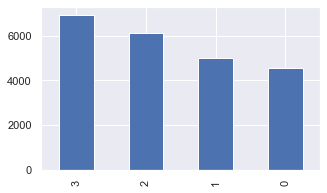

In [187]:
sns.set(rc= {'figure.figsize': (5,3)})
sns.set_style('darkgrid')

undata_orig.major_lda_topic.value_counts().plot(kind='bar')

In [188]:
undata_orig.groupby(['klabels'])['major_lda_topic'].value_counts(ascending=False, normalize=True)

klabels  major_lda_topic
0        3                  0.308226
         2                  0.267698
         1                  0.227570
         0                  0.196507
1        3                  0.363248
         0                  0.251306
         1                  0.218542
         2                  0.166904
2        2                  0.405575
         3                  0.231033
         1                  0.217320
         0                  0.146072
Name: major_lda_topic, dtype: float64

### Deriving Conclusions- Looking at the data

In [216]:
num_cols= ['Age','Positive_Feedback_Count','rev_word_count', 'unique_word_count','total_sentiment_score']

cat_cols= ['major_lda_topic','Division_Name','Department_Name','Class_Name']

cluster1= undata_orig.loc[(undata_orig.klabels==0)]
cluster2= undata_orig.loc[(undata_orig.klabels==1)]
cluster3= undata_orig.loc[(undata_orig.klabels==2)]

In [217]:
cluster1.columns= cluster1.columns.str.replace(" ", "_")
cluster2.columns= cluster2.columns.str.replace(" ", "_")
cluster3.columns= cluster3.columns.str.replace(" ", "_")

### Cluster 1 Visualization

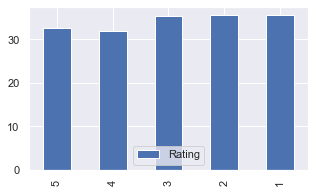

In [218]:
pd.DataFrame((cluster1.Rating.value_counts()*100)/undata_orig.Rating.value_counts()).plot(kind='bar')

Visualizing numerical features:


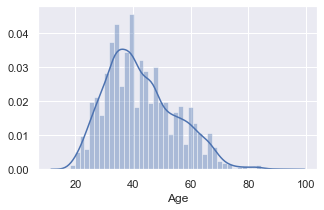

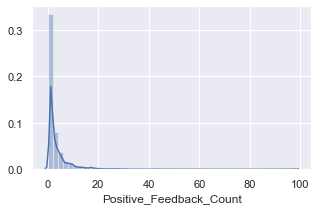

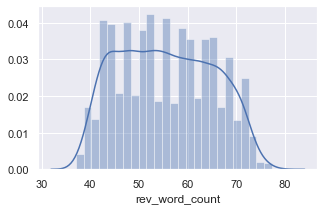

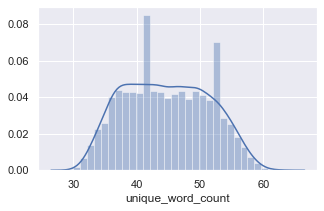

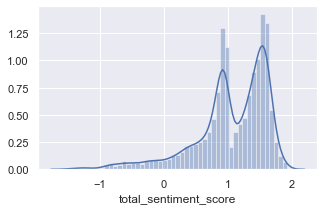

In [219]:
print('Visualizing numerical features:')
for i, col in enumerate(num_cols):
    plt.figure(i)
    sns.distplot(cluster1[col])

Visualizing categorical features:


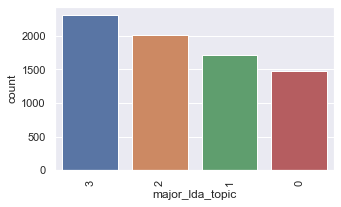

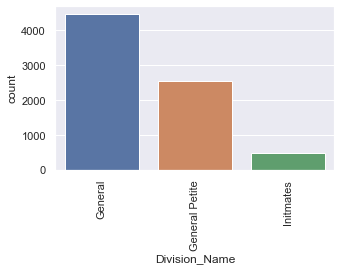

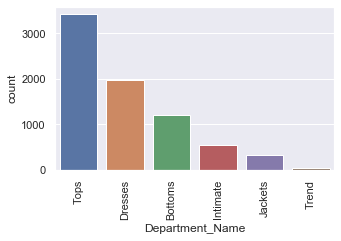

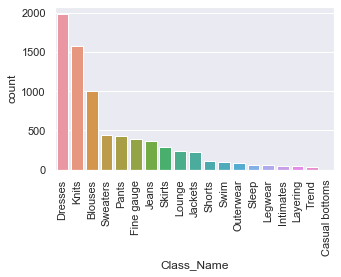

In [220]:
print('Visualizing categorical features:')
for i, col in enumerate(cat_cols):
    plt.figure(i)
    chart= sns.countplot(cluster1[col], order= cluster1[col].value_counts().index)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

### Cluster 2 Visualization

Visualizing numerical features:


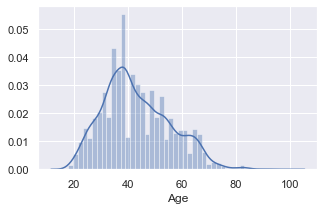

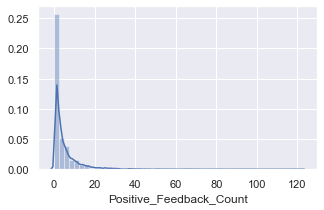

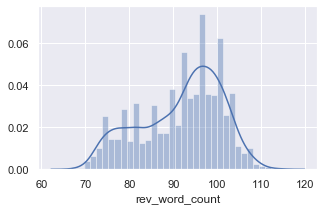

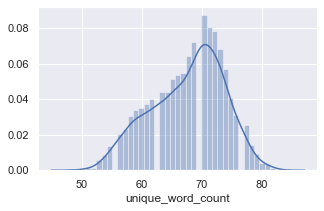

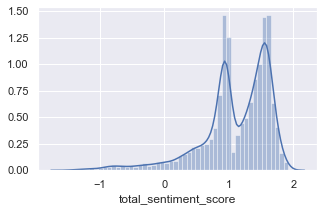

In [221]:
print('Visualizing numerical features:')
for i, col in enumerate(num_cols):
    plt.figure(i)
    sns.distplot(cluster2[col])

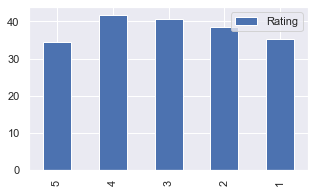

In [222]:
pd.DataFrame((cluster2.Rating.value_counts()*100)/undata_orig.Rating.value_counts()).plot(kind='bar')

Visualizing categorical features:


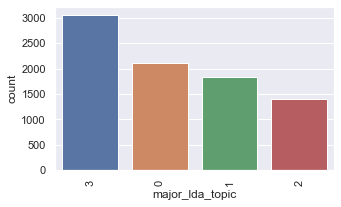

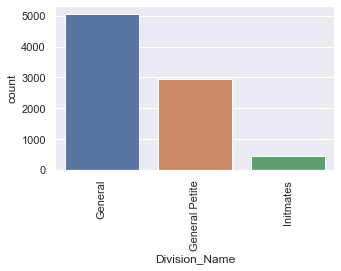

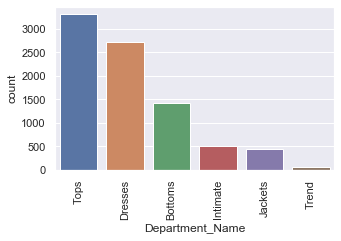

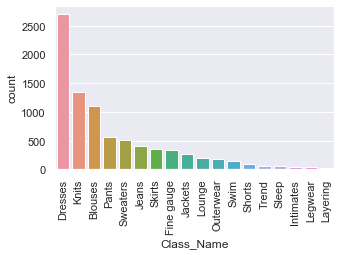

In [223]:
print('Visualizing categorical features:')
for i, col in enumerate(cat_cols):
    plt.figure(i)
    chart= sns.countplot(cluster2[col], order= cluster2[col].value_counts().index)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

### Cluster 3 Visualization

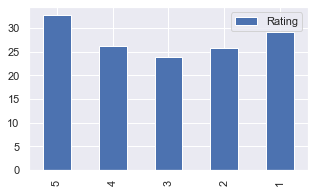

In [224]:
pd.DataFrame((cluster3.Rating.value_counts()*100)/undata_orig.Rating.value_counts()).plot(kind='bar')

Visualizing numerical features:


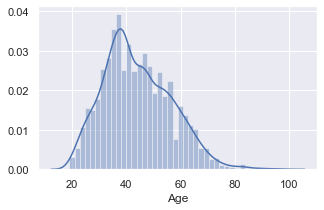

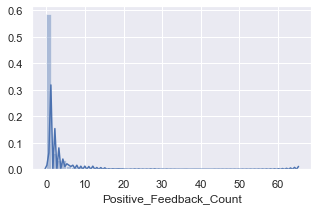

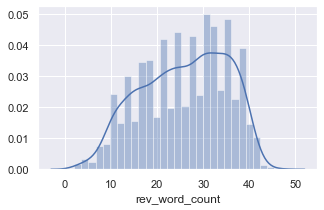

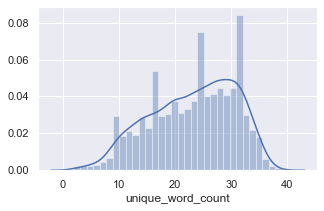

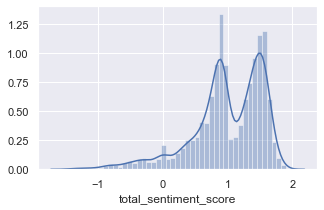

In [225]:
print('Visualizing numerical features:')
for i, col in enumerate(num_cols):
    plt.figure(i)
    sns.distplot(cluster3[col])

Visualizing categorical features:


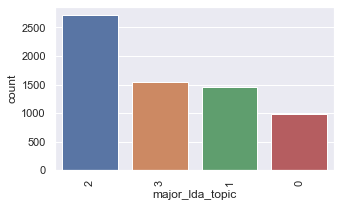

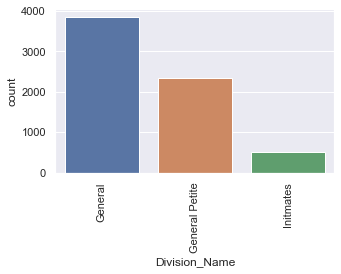

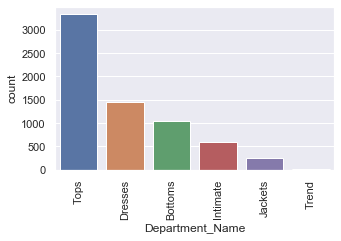

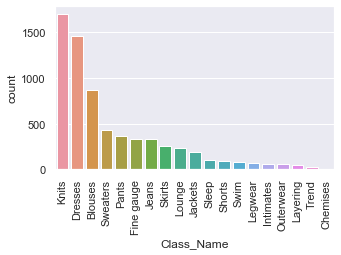

In [226]:
print('Visualizing categorical features:')
for i, col in enumerate(cat_cols):
    plt.figure(i)
    chart= sns.countplot(cluster3[col], order= cluster3[col].value_counts().index)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [227]:
topics = ldamodel.show_topics(num_words=25, formatted=False)

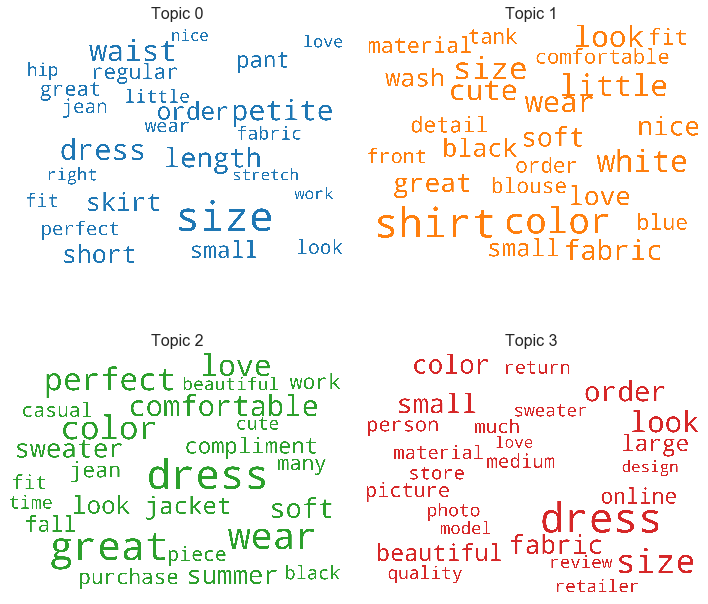

In [241]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stoplist,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab100',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Analysis and observation

### Understanding Clusters:

<b>Cluster 1 contains reviews having:</b>

Young/Middle-aged women(age group 25-40) who have written descriptive reviews(40-80 words).
Reviews are related to topic 3(31%),2,1.

<b>Cluster 2 contains reviews having:</b>

Middle/Elderly women(age group 35-60) who have written rather precise reviews(50-80 words).
Reviews are related to topic 2(~40%),3,1.

<b>Cluster 3 contains reviews having:</b>

All age groups inclusive(25-60) who have written very detailed reviews(80-110 words).
Reviews are related to topic 3(~37%),0,1.

### Understanding Topics:

<b>topic 0 contains reviews having:</b>

Reviews are related to Dress, pants, skirts.<br>
Concerning stuff: oder, look, small, petite, short, length, size.

<b>topic 1 contains reviews having:</b>

Reviews are related to bottomwear such as Shirt, fabric<br>
Concerning stuff: Size, look, little, white, wear, cute, color, soft

<b>topic 2 contains reviews having:</b>

Reviews are related to topwear such as Dress, sweater. <br>
Concerning stuff: love, great, comfortable, wear perfect, summer, soft, color

<b>topic 3 contains reviews having:</b>

Reviews are related to dress related comments<br>
Concerning stuff: Color, size, fabric, online, large, order, small, beautiful, look


# References

https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

https://medium.com/bexs-test/text-clustering-with-k-means-a039d84a941b

https://medium.com/@yanlinc/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

In [242]:
!jupyter nbconvert --to html Womens_Clothing_Review.ipynb

[NbConvertApp] Converting notebook Womens_Clothing_Review.ipynb to html
[NbConvertApp] Writing 2814374 bytes to Womens_Clothing_Review.html
